<a href="https://colab.research.google.com/github/fabriciosantana/mcdia/blob/main/DeepLearning_10_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/Processos_Jurídicos/data'

# Verificar se a pasta existe
if os.path.exists(folder_path):
    print(f"Conteúdo da pasta '{folder_path}':")
    for item in os.listdir(folder_path):
        print(item)
else:
    print(f"A pasta '{folder_path}' não foi encontrada. Por favor, verifique o caminho.")

Conteúdo da pasta '/content/drive/MyDrive/Processos_Jurídicos/data':
processos_classe_1728_numeros.txt
processos_classe_1728.jsonl
processos_classe_198.jsonl
processos_classe_198_numeros.txt
processos_classe_307.jsonl
processos_classe_307_numeros.txt
processos_classe_279_numeros.txt
processos_classe_279.jsonl
processos_classe_202.jsonl
processos_classe_202_numeros.txt
processos_classe_7.jsonl
processos_classe_7_numeros.txt
processos_para_scraping.txt
processos_classe_202_com_decisoes.txt
processos_classe_202_G2_top50.txt
processos_classe_202_G2_relatorio_top50.md
processos_classe_202_G2_relatorio_top100.md
processos_classe_202_G2_top100.txt
processos_classe_202_G2_ordem_movimentos_top100.txt
processos_classe_202_G2_ordem_movimentos_relatorio_top100.md
processos_classe_202_G2_ordem_movimentos_top200.txt
processos_classe_202_G2_ordem_movimentos_relatorio_top200.md
processos_classe_202_G2_ordem_movimentos_ordenados.txt
processos_classe_202_G2_relatorio_top200.md
processos_classe_202_G2_t

In [ ]:
import os

# O 'folder_path' já foi definido e verificado no passo anterior.
# Agora, vamos listar apenas os arquivos que estão dentro das subpastas
# da pasta principal.

print(f"Caminhos completos dos arquivos encontrados em subpastas de '{folder_path}':")

all_file_paths = []
# os.walk gera nomes de arquivos em uma árvore de diretórios, indo de cima para baixo.
# root: o caminho atual da pasta
# dirs: lista de subpastas no root
# files: lista de arquivos não-diretórios no root
for root, dirs, files in os.walk(folder_path):
    # Ignorar a pasta raiz se a profundidade for 0 (ou seja, não estamos em uma subpasta)
    # Apenas adicionar arquivos se estivermos em uma subpasta (root != folder_path)
    if root != folder_path:
        for file in files:
            full_path = os.path.join(root, file)
            all_file_paths.append(full_path)
            print(full_path)

print(f"\nTotal de arquivos encontrados em subpastas: {len(all_file_paths)}")


Caminhos completos dos arquivos encontrados em subpastas de '/content/drive/MyDrive/Processos_Jurídicos/data':
/content/drive/MyDrive/Processos_Jurídicos/data/07354477020228070000/001_VISUALIZAR_DOCUMENTOS_25_11_2022_16_26_55_AC_RD_O_.txt
/content/drive/MyDrive/Processos_Jurídicos/data/07354196820238070000/001_VISUALIZAR_DOCUMENTOS_20_10_2023_16_44_37_AC_RD_O_.txt
/content/drive/MyDrive/Processos_Jurídicos/data/07387664620228070000/001_VISUALIZAR_DOCUMENTOS_16_02_2023_09_06_03_AC_RD_O_.txt
/content/drive/MyDrive/Processos_Jurídicos/data/07387664620228070000/002_VISUALIZAR_DOCUMENTOS_16_11_2022_18_05_58_ENVIO_DE.txt
/content/drive/MyDrive/Processos_Jurídicos/data/07387664620228070000/003_VISUALIZAR_DOCUMENTOS_16_11_2022_17_30_22_DECIS_O_.txt
/content/drive/MyDrive/Processos_Jurídicos/data/07137600320238070000/001_VISUALIZAR_DOCUMENTOS_09_07_2023_16_35_02_AC_RD_O_.txt
/content/drive/MyDrive/Processos_Jurídicos/data/07137600320238070000/002_VISUALIZAR_DOCUMENTOS_17_04_2023_17_01_0

In [ ]:
import os
import glob
import pandas as pd

# Caminho raiz da pasta com os processos
folder_path = "/content/drive/MyDrive/Processos_Jurídicos/data"

# Buscar recursivamente todos os .txt dentro de subpastas
pattern = os.path.join(folder_path, "**", "*.txt")
file_paths = sorted(glob.glob(pattern, recursive=True))

print(f"Total de arquivos .txt encontrados: {len(file_paths)}")

# Montar uma base tabular com id do processo, nome do arquivo e caminho completo
registros = []
for full_path in file_paths:
    process_id = os.path.basename(os.path.dirname(full_path))  # última pasta antes do arquivo
    file_name = os.path.basename(full_path)
    registros.append({
        "process_id": process_id,
        "file_name": file_name,
        "file_path": full_path,
    })

df_arquivos = pd.DataFrame(registros)

print(df_arquivos.head())


Total de arquivos .txt encontrados: 800
             process_id                                          file_name  \
0  07000960220238070000  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_...   
1  07000960220238070000  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_...   
2  07002005720238079000  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_...   
3  07002005720238079000  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_...   
4  07002221820238079000  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_...   

                                           file_path  
0  /content/drive/MyDrive/Processos_Jurídicos/da...  
1  /content/drive/MyDrive/Processos_Jurídicos/da...  
2  /content/drive/MyDrive/Processos_Jurídicos/da...  
3  /content/drive/MyDrive/Processos_Jurídicos/da...  
4  /content/drive/MyDrive/Processos_Jurídicos/da...  


### Bloco 1 — Leitura dos arquivos de texto e criação do dataset bruto em Parquet

Este bloco:

- Percorre todas as subpastas da pasta raiz onde estão os processos do TJDFT.
- Localiza apenas arquivos `.txt`.
- Lê o conteúdo de cada arquivo de texto.
- Monta um DataFrame com as colunas:
  - `process_id`: ID do processo (nome da pasta imediatamente acima do arquivo)
  - `file_name`: nome do arquivo `.txt`
  - `file_path`: caminho completo do arquivo
  - `text_raw`: texto bruto do arquivo
- Salva o resultado em um arquivo Parquet para uso posterior na etapa de Deep Learning jurídico (`decisão` x `outro`).


In [ ]:
# ============================================
# Bloco 1 — Ler arquivos .txt e salvar dataset bruto em Parquet
# ============================================

import os
import glob
import pandas as pd

# 1) Definir o caminho raiz onde estão as pastas dos processos
#    Ajuste se o seu caminho for diferente.
folder_path = "/content/drive/MyDrive/Processos_Jurídicos/data"

# 2) Definir o caminho de saída do arquivo Parquet consolidado
#    Você pode alterar o nome/pasta se quiser.
output_dir = "/content/drive/MyDrive/Processos_Jurídicos/datasets"
os.makedirs(output_dir, exist_ok=True)
output_parquet_path = os.path.join(output_dir, "tjdf_textos_brutos.parquet")

print(f"Pasta raiz dos processos: {folder_path}")
print(f"Caminho do Parquet de saída: {output_parquet_path}")

# 3) Usar glob para buscar recursivamente todos os arquivos .txt
#    pattern = <folder_path>/**/<qualquer_coisa>.txt
pattern = os.path.join(folder_path, "**", "*.txt")
file_paths = sorted(glob.glob(pattern, recursive=True))

print(f"Total de arquivos .txt encontrados: {len(file_paths)}")

# 4) Montar uma lista de registros com metadados + texto
registros = []

for i, full_path in enumerate(file_paths, start=1):
    # process_id -> nome da pasta imediatamente acima do arquivo
    process_id = os.path.basename(os.path.dirname(full_path))
    # file_name -> nome do arquivo
    file_name = os.path.basename(full_path)

    # 4.1) Ler o conteúdo do arquivo de texto
    #      - encoding utf-8
    #      - errors="ignore" para evitar quebra por caracteres problemáticos
    try:
        with open(full_path, "r", encoding="utf-8", errors="ignore") as f:
            text_raw = f.read()
    except Exception as e:
        print(f"[ERRO] Não foi possível ler o arquivo: {full_path}")
        print(f"       Detalhes: {e}")
        # Pula este arquivo, mas registra o problema se quiser
        continue

    # 4.2) Adicionar registro à lista
    registros.append({
        "process_id": process_id,
        "file_name": file_name,
        "file_path": full_path,
        "text_raw": text_raw,
    })

    # Log opcional a cada N arquivos para acompanhamento
    if i % 100 == 0:
        print(f"{i} arquivos processados...")

print(f"\nTotal de registros válidos carregados: {len(registros)}")

# 5) Criar DataFrame a partir da lista de registros
df_textos = pd.DataFrame(registros)

print("\nAmostra do DataFrame resultante:")
print(df_textos.head())

print("\nDistribuição de arquivos por processo (primeiras linhas):")
print(df_textos["process_id"].value_counts().head())

# 6) Salvar em Parquet
df_textos.to_parquet(output_parquet_path, index=False)
print(f"\nArquivo Parquet salvo com sucesso em:\n{output_parquet_path}")


Pasta raiz dos processos: /content/drive/MyDrive/Processos_Jurídicos/data
Caminho do Parquet de saída: /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_brutos.parquet
Total de arquivos .txt encontrados: 800
100 arquivos processados...
200 arquivos processados...
300 arquivos processados...
400 arquivos processados...
500 arquivos processados...
600 arquivos processados...
700 arquivos processados...
800 arquivos processados...

Total de registros válidos carregados: 800

Amostra do DataFrame resultante:
             process_id                                          file_name  \
0  07000960220238070000  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_...   
1  07000960220238070000  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_...   
2  07002005720238079000  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_...   
3  07002005720238079000  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_...   
4  07002221820238079000  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_...   

     

### Bloco 2 — Pré-processamento e criação de rótulos fracos (`decisao` x `outro` x `indefinido`)

Este bloco:

- Carrega o Parquet bruto criado no Bloco 1 (`tjdf_textos_brutos.parquet`).
- Remove registros com texto vazio ou nulo.
- Cria versões em maiúsculas do nome do arquivo e do texto para facilitar a busca de padrões.
- Define padrões jurídicos simples para identificar **decisões** (sentença/acórdão/decisão) e **outros documentos** (certidão, petição, envio de documento, ofício etc.).
- A partir desses padrões, cria uma coluna de **rótulo fraco** chamada `label_weak` com três possíveis valores:
  - `"decisao"`
  - `"outro"`
  - `"indefinido"`
- Gera um novo arquivo Parquet (`tjdf_textos_weaklabels.parquet`) com as colunas originais + colunas auxiliares de marcação e o rótulo fraco.


In [ ]:
# ============================================
# Bloco 2 — Pré-processamento + rótulos fracos (decisao x outro)
# ============================================

import os
import pandas as pd
import numpy as np

# 1) Definir caminhos de entrada e saída
base_dir = "/content/drive/MyDrive/Processos_Jurídicos"

input_parquet_path = os.path.join(base_dir, "datasets", "tjdf_textos_brutos.parquet")
output_parquet_path = os.path.join(base_dir, "datasets", "tjdf_textos_weaklabels.parquet")

print(f"Caminho de entrada (Parquet bruto): {input_parquet_path}")
print(f"Caminho de saída (Parquet com rótulos fracos): {output_parquet_path}")

# 2) Carregar o dataset bruto
df = pd.read_parquet(input_parquet_path)
print(f"\nRegistros carregados: {len(df)}")

print("\nColunas disponíveis:")
print(df.columns)

print("\nAmostra inicial:")
print(df.head())

# 3) Remover registros com texto nulo ou vazio
df["text_raw"] = df["text_raw"].astype(str)

# Criar uma coluna com o tamanho do texto, para filtragem e inspeção
df["text_length"] = df["text_raw"].str.len()

# Remover textos "vazios" (por exemplo, < 10 caracteres)
df = df[df["text_length"] >= 10].copy()

print(f"\nRegistros após remoção de textos muito curtos: {len(df)}")

# 4) Criar colunas auxiliares em maiúsculas para facilitar busca por padrões
df["file_name_upper"] = df["file_name"].str.upper()
df["text_upper"] = df["text_raw"].str.upper()

# 5) Definir padrões de decisão e de outros documentos
#    Estes padrões podem ser refinados depois com base em exemplos reais.

# Padrões em NOME DE ARQUIVO que sugerem "decisão"
patterns_decisao_nome = [
    "DECIS_",      # DECIS_O_, DECIS_AO_
    "DECISAO",     # DECISAO
    "SENTENCA",    # SENTENCA
    "SENTENÇA",    # SENTENÇA (se chegar com acento em alguns casos)
    "AC_RD_O",     # AC_RD_O (padrão comum de ACÓRDÃO mal codificado)
    "ACORDAO",     # ACORDAO
    "ACÓRDAO",     # variação acentuada, só por garantia
]

# Padrões em TEXTO que sugerem "decisão"
patterns_decisao_texto = [
    "DECISÃO",
    "SENTENÇA",
    "ACÓRDÃO",
    "ACORDAO",
    "ISTO POSTO",
    "ISTO EXPOSTO",
    "JULGO PROCEDENTE",
    "JULGO IMPROCEDENTE",
    "RESOLVO",
]

# Padrões em NOME DE ARQUIVO que sugerem "outro documento" (não decisão)
patterns_outro_nome = [
    "ENVIO_DE",
    "PETICAO",
    "PETIÇÃO",
    "OFICIO",
    "OFÍCIO",
    "CERTIDAO",
    "CERTIDÃO",
    "COMPROVANTE",
    "INTIMACAO",
    "INTIMAÇÃO",
]

# Padrões em TEXTO que sugerem "outro documento"
patterns_outro_texto = [
    "CERTIDÃO",
    "CERTIDAO",
    "OFÍCIO",
    "OFICIO",
    "PETIÇÃO",
    "PETICAO",
    "REQUERIMENTO",
    "COMUNICO",
    "INTIMAÇÃO",
    "INTIMACAO",
]

# 6) Funções auxiliares para verificar se qualquer padrão ocorre em uma string

def has_any_pattern(series: pd.Series, patterns) -> pd.Series:
    """
    Retorna uma Series booleana indicando se qualquer um dos padrões aparece
    na string. Usa str.contains com regex OR.
    """
    if not patterns:
        return pd.Series(False, index=series.index)

    # Monta regex do tipo: (PAT1|PAT2|PAT3)
    # Escapa padrões que possam ter caracteres especiais
    import re
    escaped = [re.escape(p) for p in patterns]
    regex = "(" + "|".join(escaped) + ")"
    return series.str.contains(regex, na=False, regex=True)

# 7) Criar colunas booleanas de "sinais" de decisão/outro

df["has_decisao_nome"] = has_any_pattern(df["file_name_upper"], patterns_decisao_nome)
df["has_decisao_texto"] = has_any_pattern(df["text_upper"], patterns_decisao_texto)

df["has_outro_nome"] = has_any_pattern(df["file_name_upper"], patterns_outro_nome)
df["has_outro_texto"] = has_any_pattern(df["text_upper"], patterns_outro_texto)

# 8) Definir rótulo fraco com base nos sinais
#    Regra de decisão:
#    - Se qualquer sinal de decisão (nome OU texto) → "decisao"
#    - Senão, se sinal de outro documento (nome OU texto) → "outro"
#    - Caso contrário → "indefinido"

cond_decisao = df["has_decisao_nome"] | df["has_decisao_texto"]
cond_outro = (~cond_decisao) & (df["has_outro_nome"] | df["has_outro_texto"])

df["label_weak"] = np.select(
    [cond_decisao, cond_outro],
    ["decisao", "outro"],
    default="indefinido"
)

# 9) Inspeção rápida da distribuição dos rótulos fracos

print("\nDistribuição dos rótulos fracos (label_weak):")
print(df["label_weak"].value_counts())

print("\nExemplos de 'decisao':")
print(df.loc[df["label_weak"] == "decisao", ["process_id", "file_name"]].head(10))

print("\nExemplos de 'outro':")
print(df.loc[df["label_weak"] == "outro", ["process_id", "file_name"]].head(10))

print("\nExemplos de 'indefinido':")
print(df.loc[df["label_weak"] == "indefinido", ["process_id", "file_name"]].head(10))

# 10) Salvar o DataFrame com rótulos fracos em Parquet

df.to_parquet(output_parquet_path, index=False)
print(f"\nArquivo Parquet com rótulos fracos salvo em:\n{output_parquet_path}")


Caminho de entrada (Parquet bruto): /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_brutos.parquet
Caminho de saída (Parquet com rótulos fracos): /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_weaklabels.parquet

Registros carregados: 800

Colunas disponíveis:
Index(['process_id', 'file_name', 'file_path', 'text_raw'], dtype='object')

Amostra inicial:
             process_id                                          file_name  \
0  07000960220238070000  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_...   
1  07000960220238070000  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_...   
2  07002005720238079000  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_...   
3  07002005720238079000  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_...   
4  07002221820238079000  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_...   

                                           file_path  \
0  /content/drive/MyDrive/Processos_Jurídicos/da...   
1  /content/drive/MyDrive/Pro

/tmp/ipython-input-1876887021.py:113: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return series.str.contains(regex, na=False, regex=True)
/tmp/ipython-input-1876887021.py:113: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return series.str.contains(regex, na=False, regex=True)
/tmp/ipython-input-1876887021.py:113: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return series.str.contains(regex, na=False, regex=True)
/tmp/ipython-input-1876887021.py:113: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return series.str.contains(regex, na=False, regex=True)



Distribuição dos rótulos fracos (label_weak):
label_weak
decisao       772
indefinido     22
outro           1
Name: count, dtype: int64

Exemplos de 'decisao':
             process_id                                          file_name
0  07000960220238070000  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_...
1  07000960220238070000  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_...
2  07002005720238079000  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_...
3  07002005720238079000  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_...
4  07002221820238079000  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_...
5  07002221820238079000  002_VISUALIZAR_DOCUMENTOS_06_03_2023_15_13_21_...
6  07004113020228079000  001_01_06_2023_16_42_48_0700411_30_2022_8_07_9...
7  07004113020228079000  002_VISUALIZAR_DOCUMENTOS_25_04_2023_18_31_25_...
8  07004113020228079000  003_VISUALIZAR_DOCUMENTOS_13_06_2022_17_07_54_...
9  07007647520208070000  001_VISUALIZAR_DOCUMENTOS_11_03_2020_17_44_12_...

Exemplos de 

<!-- ### Bloco 3 — Treinando Legal-BERT PT para classificar `decisão` x `outro`

Este bloco:

- Carrega o dataset com rótulos fracos (`tjdf_textos_weaklabels.parquet`).
- Cria um rótulo binário `label_bin`:
  - `1` → documento classificado como `decisao` pelas regras heurísticas.
  - `0` → documento classificado como `outro` ou `indefinido`.
- Lida com o desbalanceamento de classes (muito mais decisões do que outros documentos) por subamostragem da classe positiva.
- Separa os dados em treino e validação.
- Carrega o modelo **LegalBert-pt** em português jurídico.
- Fine-tuna uma cabeça de classificação binária (`decisão` x `outro`) usando o texto bruto.
- Prepara o modelo para ser usado no próximo bloco para rotular todos os documentos. -->


### Bloco 3 — Legal-BERT PT como extrator de embeddings + Logistic Regression (`decisão` x `outro`)

Este bloco:

- Carrega o dataset com rótulos fracos (`tjdf_textos_weaklabels.parquet`).
- Cria um rótulo binário `label_bin`:
  - `1` → documentos rotulados como `decisao` pelas heurísticas.
  - `0` → documentos rotulados como `outro` ou `indefinido`.
- Monta um dataset balanceado (todos os negativos e até 4x mais positivos).
- Usa o modelo Legal-BERT PT como **extrator de embeddings**:
  - Gera um vetor denso (CLS embedding) para cada texto.
- Treina um classificador leve (`LogisticRegression`) em cima desses embeddings para distinguir `decisão` x `outro`.
- Avalia o desempenho no conjunto de validação.
- Salva o classificador treinado para uso posterior (Bloco 4).


In [ ]:
# ============================================
# Bloco 3 — Legal-BERT PT como extrator + Logistic Regression
# ============================================

!pip install -q transformers scikit-learn

import os
import numpy as np
import pandas as pd
import torch

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

from transformers import AutoTokenizer, AutoModel

# 1) Caminhos de entrada/saída
base_dir = "/content/drive/MyDrive/Processos_Jurídicos"
input_parquet_path = os.path.join(base_dir, "datasets", "tjdf_textos_weaklabels.parquet")
model_output_dir = os.path.join(base_dir, "models", "legalbert_decisao_outro_sklearn")

os.makedirs(model_output_dir, exist_ok=True)

print(f"Caminho do Parquet com rótulos fracos: {input_parquet_path}")
print(f"Diretório de saída do classificador:   {model_output_dir}")

# 2) Carregar o dataset
df = pd.read_parquet(input_parquet_path)
print(f"\nRegistros carregados: {len(df)}")

# 3) Criar rótulo binário: 1 = decisão, 0 = outro/indefinido
df["label_bin"] = np.where(df["label_weak"] == "decisao", 1, 0)

print("\nDistribuição de label_bin (0=outro, 1=decisão):")
print(df["label_bin"].value_counts())

# 4) Balanceamento: todos os 0 e até 4x mais 1
df_pos = df[df["label_bin"] == 1].copy()
df_neg = df[df["label_bin"] == 0].copy()

n_pos_total = len(df_pos)
n_neg_total = len(df_neg)

print(f"\nTotal positivos (decisão = 1): {n_pos_total}")
print(f"Total negativos (outro = 0):  {n_neg_total}")

if n_neg_total > 0:
    n_pos_amostra = min(n_pos_total, n_neg_total * 4)
else:
    n_pos_amostra = min(n_pos_total, 100)

df_pos_sample = df_pos.sample(n=n_pos_amostra, random_state=42)
df_balanced = pd.concat([df_pos_sample, df_neg], axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

print(f"\nTamanho do dataset balanceado: {len(df_balanced)}")
print(df_balanced["label_bin"].value_counts())

# 5) Separar em treino e validação
train_df, eval_df = train_test_split(
    df_balanced,
    test_size=0.2,
    stratify=df_balanced["label_bin"],
    random_state=42
)

print(f"\nTamanho treino: {len(train_df)}, Tamanho validação: {len(eval_df)}")
print("Distribuição treino:")
print(train_df["label_bin"].value_counts())
print("Distribuição validação:")
print(eval_df["label_bin"].value_counts())

# 6) Carregar Legal-BERT PT como extrator de embeddings
model_name = "raquelsilveira/legalbertpt_fp"  # LegalBert-pt FP

tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
bert_model.eval()

print(f"\nUsando device: {device}")

# 7) Função para gerar embeddings CLS
@torch.no_grad()
def embed_texts(texts, batch_size=8, max_length=256):
    """
    Gera embeddings CLS para uma lista de textos usando Legal-BERT.
    Retorna um array numpy de shape (N, hidden_size).
    """
    all_embeddings = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        # Garante lista de strings
        batch_texts = [str(t) for t in batch_texts]

        enc = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        enc = {k: v.to(device) for k, v in enc.items()}

        outputs = bert_model(**enc)
        # CLS embedding: primeiro token da última camada
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # (batch_size, hidden_size)

        all_embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(all_embeddings)

# 8) Gerar embeddings para treino e validação
print("\nGerando embeddings para o conjunto de treino...")
X_train = embed_texts(train_df["text_raw"].tolist(), batch_size=8, max_length=256)
y_train = train_df["label_bin"].values

print("Gerando embeddings para o conjunto de validação...")
X_eval = embed_texts(eval_df["text_raw"].tolist(), batch_size=8, max_length=256)
y_eval = eval_df["label_bin"].values

print(f"\nShape X_train: {X_train.shape}, Shape X_eval: {X_eval.shape}")

# 9) Criar pipeline: normalização + LogisticRegression
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=200,
        class_weight="balanced",   # reforça a atenção à classe minoritária
        random_state=42
    ))
])

print("\nTreinando LogisticRegression sobre embeddings Legal-BERT...")
clf.fit(X_train, y_train)
print("Treinamento concluído.")

# 10) Avaliação
y_pred = clf.predict(X_eval)

acc = accuracy_score(y_eval, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_eval, y_pred, average="binary", zero_division=0)

print("\nMétricas no conjunto de validação:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nRelatório completo:")
print(classification_report(y_eval, y_pred, digits=4))

# 11) Salvar o classificador treinado e info auxiliar
clf_path = os.path.join(model_output_dir, "legalbert_decisao_outro_logreg.joblib")
joblib.dump(clf, clf_path)

print(f"\nClassificador LogisticRegression salvo em:\n{clf_path}")


Caminho do Parquet com rótulos fracos: /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_weaklabels.parquet
Diretório de saída do classificador:   /content/drive/MyDrive/Processos_Jurídicos/models/legalbert_decisao_outro_sklearn

Registros carregados: 795

Distribuição de label_bin (0=outro, 1=decisão):
label_bin
1    772
0     23
Name: count, dtype: int64

Total positivos (decisão = 1): 772
Total negativos (outro = 0):  23

Tamanho do dataset balanceado: 115
label_bin
1    92
0    23
Name: count, dtype: int64

Tamanho treino: 92, Tamanho validação: 23
Distribuição treino:
label_bin
1    74
0    18
Name: count, dtype: int64
Distribuição validação:
label_bin
1    18
0     5
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at raquelsilveira/legalbertpt_fp and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Usando device: cpu

Gerando embeddings para o conjunto de treino...
Gerando embeddings para o conjunto de validação...

Shape X_train: (92, 768), Shape X_eval: (23, 768)

Treinando LogisticRegression sobre embeddings Legal-BERT...
Treinamento concluído.

Métricas no conjunto de validação:
Accuracy : 0.9565
Precision: 0.9474
Recall   : 1.0000
F1-score : 0.9730

Relatório completo:
              precision    recall  f1-score   support

           0     1.0000    0.8000    0.8889         5
           1     0.9474    1.0000    0.9730        18

    accuracy                         0.9565        23
   macro avg     0.9737    0.9000    0.9309        23
weighted avg     0.9588    0.9565    0.9547        23


Classificador LogisticRegression salvo em:
/content/drive/MyDrive/Processos_Jurídicos/models/legalbert_decisao_outro_sklearn/legalbert_decisao_outro_logreg.joblib


### Bloco 4 — Aplicando Legal-BERT + Logistic Regression em todos os documentos

Este bloco:

- Carrega o dataset com rótulos fracos (`tjdf_textos_weaklabels.parquet`).
- Carrega o modelo Legal-BERT PT como extrator de embeddings e o classificador `LogisticRegression` treinado no Bloco 3.
- Gera embeddings para **todos** os textos (795 registros).
- Calcula, para cada documento:
  - `label_model_decisao` → 1 se o modelo considera o documento uma decisão, 0 caso contrário.
  - `prob_decisao_model` → probabilidade de ser decisão segundo o classificador.
- Compara a distribuição de `label_model_decisao` com `label_weak` (heurístico).
- Salva o resultado em um novo arquivo Parquet consolidado:
  - `tjdf_textos_legalbert_decisao.parquet`
para ser usado nas próximas etapas (análise de sentimento, extração de dispositivo, etc.).


In [ ]:
# ============================================
# Bloco 4 — Aplicar Legal-BERT + Logistic Regression em todos os 795 documentos
# ============================================

!pip install -q transformers scikit-learn joblib

import os
import numpy as np
import pandas as pd
import torch
import joblib

from transformers import AutoTokenizer, AutoModel

# 1) Caminhos de entrada/saída
base_dir = "/content/drive/MyDrive/Processos_Jurídicos"

input_parquet_path = os.path.join(base_dir, "datasets", "tjdf_textos_weaklabels.parquet")
output_parquet_path = os.path.join(base_dir, "datasets", "tjdf_textos_legalbert_decisao.parquet")

model_dir = os.path.join(base_dir, "models", "legalbert_decisao_outro_sklearn")
clf_path = os.path.join(model_dir, "legalbert_decisao_outro_logreg.joblib")

print(f"Caminho do Parquet com rótulos fracos: {input_parquet_path}")
print(f"Caminho do classificador:              {clf_path}")
print(f"Caminho de saída (Parquet final):      {output_parquet_path}")

# 2) Carregar dataset completo
df = pd.read_parquet(input_parquet_path)
print(f"\nRegistros carregados: {len(df)}")
print(df[["process_id", "file_name", "label_weak"]].head())

# 3) Carregar Legal-BERT PT e o classificador treinado
model_name = "raquelsilveira/legalbertpt_fp"  # mesmo modelo usado no Bloco 3

tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

clf = joblib.load(clf_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
bert_model.eval()

print(f"\nUsando device: {device}")

# 4) Função para gerar embeddings CLS (reutilizando a lógica do Bloco 3)
@torch.no_grad()
def embed_texts(texts, batch_size=8, max_length=256):
    all_embeddings = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_texts = [str(t) for t in batch_texts]

        enc = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        enc = {k: v.to(device) for k, v in enc.items()}
        outputs = bert_model(**enc)

        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # (batch_size, hidden_size)
        all_embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(all_embeddings)

# 5) Gerar embeddings para TODOS os documentos
print("\nGerando embeddings para todos os documentos...")
X_all = embed_texts(df["text_raw"].tolist(), batch_size=8, max_length=256)
print(f"Shape X_all: {X_all.shape}")

# 6) Aplicar o classificador LogisticRegression
print("\nAplicando o classificador em todos os documentos...")
y_proba = clf.predict_proba(X_all)[:, 1]  # probabilidade da classe 1 (decisão)
y_pred = clf.predict(X_all)               # rótulo binário 0/1

# 7) Adicionar colunas ao DataFrame
df["prob_decisao_model"] = y_proba
df["label_model_decisao"] = y_pred.astype(int)

# Opcional: rótulo textual amigável
df["label_model_decisao_txt"] = df["label_model_decisao"].map({1: "decisao", 0: "outro"})

# 8) Análises rápidas de consistência

print("\nDistribuição de rótulos heurísticos (label_weak):")
print(df["label_weak"].value_counts())

print("\nDistribuição de rótulos do modelo (label_model_decisao):")
print(df["label_model_decisao"].value_counts())

print("\nCruzamento heurístico x modelo:")
print(pd.crosstab(df["label_weak"], df["label_model_decisao"], rownames=["label_weak"], colnames=["label_model_decisao"]))

print("\nAmostra de documentos onde heurística != modelo:")
dif_df = df[df["label_weak"].replace({"decisao": 1, "outro": 0, "indefinido": 0}) != df["label_model_decisao"]]
print(dif_df[["process_id", "file_name", "label_weak", "label_model_decisao_txt", "prob_decisao_model"]].head(20))

# 9) Salvar o DataFrame final em Parquet
df.to_parquet(output_parquet_path, index=False)
print(f"\nArquivo Parquet final salvo em:\n{output_parquet_path}")


Caminho do Parquet com rótulos fracos: /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_weaklabels.parquet
Caminho do classificador:              /content/drive/MyDrive/Processos_Jurídicos/models/legalbert_decisao_outro_sklearn/legalbert_decisao_outro_logreg.joblib
Caminho de saída (Parquet final):      /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_legalbert_decisao.parquet

Registros carregados: 795
             process_id                                          file_name  \
0  07000960220238070000  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_...   
1  07000960220238070000  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_...   
2  07002005720238079000  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_...   
3  07002005720238079000  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_...   
4  07002221820238079000  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_...   

  label_weak  
0    decisao  
1    decisao  
2    decisao  
3    decisao  
4    decisao  


Some weights of BertModel were not initialized from the model checkpoint at raquelsilveira/legalbertpt_fp and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Usando device: cpu

Gerando embeddings para todos os documentos...
Shape X_all: (795, 768)

Aplicando o classificador em todos os documentos...

Distribuição de rótulos heurísticos (label_weak):
label_weak
decisao       772
indefinido     22
outro           1
Name: count, dtype: int64

Distribuição de rótulos do modelo (label_model_decisao):
label_model_decisao
1    773
0     22
Name: count, dtype: int64

Cruzamento heurístico x modelo:
label_model_decisao   0    1
label_weak                  
decisao               0  772
indefinido           21    1
outro                 1    0

Amostra de documentos onde heurística != modelo:
    process_id                         file_name  label_weak  \
789       data  relatorio_movimentos_por_ano.txt  indefinido   

    label_model_decisao_txt  prob_decisao_model  
789                 decisao            0.999946  


/tmp/ipython-input-2749008634.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dif_df = df[df["label_weak"].replace({"decisao": 1, "outro": 0, "indefinido": 0}) != df["label_model_decisao"]]



Arquivo Parquet final salvo em:
/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_legalbert_decisao.parquet


### Bloco 5 — Consolidar a base final de decisões (`tjdf_decisoes_base.parquet`)

Este bloco:

- Carrega o arquivo `tjdf_textos_legalbert_decisao.parquet`, que contém:
  - o texto bruto (`text_raw`),
  - rótulos heurísticos (`label_weak`),
  - rótulos do modelo (`label_model_decisao` e `prob_decisao_model`).
- Define um critério final para marcar se um documento será considerado **decisão** no projeto:
  - `is_decisao_final = True` se:
    - `label_weak == "decisao"` **ou**
    - `label_model_decisao == 1`
  - **Exclui** registros auxiliares com `process_id == "data"` (relatórios e agregados).
- Filtra apenas as linhas com `is_decisao_final = True`.
- Mostra a contagem total de decisões finais.
- Salva o resultado em um novo Parquet:
  - `tjdf_decisoes_base.parquet`
que será usado nas próximas etapas (limpeza de texto, extração de dispositivo, análise de sentimento jurídico).


In [ ]:
# ============================================
# Bloco 5 — Consolidar base final de decisões
# ============================================

import os
import pandas as pd
import numpy as np

base_dir = "/content/drive/MyDrive/Processos_Jurídicos"

input_parquet_path = os.path.join(base_dir, "datasets", "tjdf_textos_legalbert_decisao.parquet")
output_parquet_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_base.parquet")

print(f"Caminho de entrada (com modelo): {input_parquet_path}")
print(f"Caminho de saída (base de decisões): {output_parquet_path}")

# 1) Carregar o dataset completo (com heurística + modelo)
df = pd.read_parquet(input_parquet_path)
print(f"\nRegistros carregados: {len(df)}")

print("\nColunas principais:")
print(df[["process_id", "file_name", "label_weak", "label_model_decisao", "prob_decisao_model"]].head())

# 2) Criar flag final de decisão

# Mapeia label_weak para um rótulo binário heurístico auxiliar
label_weak_bin = df["label_weak"].map({"decisao": 1, "outro": 0, "indefinido": 0}).fillna(0).astype(int)

# Condição 1: heurística diz que é decisão
cond_heuristica = label_weak_bin == 1

# Condição 2: modelo diz que é decisão (label_model_decisao == 1)
cond_modelo = df["label_model_decisao"] == 1

# Combinação: se qualquer um marcar como decisão, consideramos decisão,
# DESDE QUE não seja um registro auxiliar (process_id == "data").
cond_nao_auxiliar = df["process_id"] != "data"

df["is_decisao_final"] = (cond_nao_auxiliar) & (cond_heuristica | cond_modelo)

print("\nDistribuição de is_decisao_final:")
print(df["is_decisao_final"].value_counts())

# 3) Filtrar apenas decisões finais
df_decisoes = df[df["is_decisao_final"]].copy().reset_index(drop=True)

print(f"\nTotal de decisões na base final: {len(df_decisoes)}")
print("\nAmostra da base final de decisões:")
print(df_decisoes[["process_id", "file_name", "label_weak", "label_model_decisao", "prob_decisao_model"]].head())

# 4) Salvar base final em Parquet
df_decisoes.to_parquet(output_parquet_path, index=False)
print(f"\nBase final de decisões salva em:\n{output_parquet_path}")


Caminho de entrada (com modelo): /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_textos_legalbert_decisao.parquet
Caminho de saída (base de decisões): /content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_base.parquet

Registros carregados: 795

Colunas principais:
             process_id                                          file_name  \
0  07000960220238070000  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_...   
1  07000960220238070000  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_...   
2  07002005720238079000  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_...   
3  07002005720238079000  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_...   
4  07002221820238079000  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_...   

  label_weak  label_model_decisao  prob_decisao_model  
0    decisao                    1            0.999476  
1    decisao                    1            0.998629  
2    decisao                    1            0.999834  
3    decisao      

### Bloco 6 (revisado) — Extração avançada de metadados, com foco no julgador

Este bloco:

- Reabre `tjdf_decisoes_base.parquet`.
- Usa um conjunto de **expressões regulares específicas** para capturar:
  - Nome do julgador
  - Cargo do julgador (Desembargador(a), Juiz(a), Relator(a))
- Cobre explicitamente padrões como:
  - "Gabinete do Desembargador Alvaro Ciarlini"
  - "O Senhor Desembargador ALVARO CIARLINI - Relator"
  - "Relatora    Desembargadora FÁTIMA RAFAEL"
  - "Desembargador FERNANDO HABIBE"
- Se as regex falharem, utiliza um fallback simples com NER (spaCy `pt_core_news_sm`) para tentar capturar a primeira entidade PERSON.
- Recalcula:
  - `nome_julgador`
  - `cargo_julgador`
  - `sexo_julgador`
- Mantém (ou recria) os outros campos: número do processo, classe, partes, datas, ementa.
- Salva o resultado em `tjdf_decisoes_enriquecidas.parquet` (sobrescrevendo a versão anterior).


In [ ]:
# Bloco 6_setup — Instalar modelo spaCy PT

!pip install -q spacy
!python -m spacy download pt_core_news_sm

import spacy
nlp = spacy.load("pt_core_news_sm")

print("Modelo spaCy pt_core_news_sm carregado com sucesso.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Modelo spaCy pt_core_news_sm carregado com sucesso.


In [ ]:
# ============================================
# Bloco 6 (revisado) — Extração avançada de metadados
# ============================================

import os
import re
import pandas as pd
import spacy

# Se já carregou no Bloco 6_setup, pode reaproveitar.
# Caso contrário, descomente a linha abaixo:
# nlp = spacy.load("pt_core_news_sm")

base_dir = "/content/drive/MyDrive/Processos_Jurídicos"

input_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_base.parquet")
output_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_enriquecidas.parquet")

print("Carregando decisões filtradas...")
df = pd.read_parquet(input_path)
print(f"Total de decisões: {len(df)}")

# ------------------------------------------------
# 1) Funções auxiliares genéricas
# ------------------------------------------------

def extrair_numero_processo(texto):
    padrao = r"\b\d{7}-\d{2}\.\d{4}\.\d\.\d{2}\.\d{4}\b"
    match = re.search(padrao, texto)
    return match.group(0) if match else None


def extrair_classe(texto):
    classes = [
        "APELAÇÃO", "AGRAVO DE INSTRUMENTO", "AGRAVO",
        "MANDADO DE SEGURANÇA", "RECURSO INOMINADO",
        "AÇÃO PENAL", "AÇÃO CIVIL", "AÇÃO DE COBRANÇA",
        "PROCEDIMENTO COMUM", "EMBARGOS DE DECLARAÇÃO"
    ]
    txt_low = texto.lower()
    for c in classes:
        if c.lower() in txt_low:
            return c
    return None


def extrair_data_julgamento(texto):
    padrao = r"\b(\d{2}[\/\-]\d{2}[\/\-]\d{4})\b"
    match = re.search(padrao, texto)
    return match.group(1) if match else None


def extrair_ementa(texto):
    padrao = r"EMENTA(.*?)(DECIS[ÃA]O|RELAT[ÓO]RIO)"
    match = re.search(padrao, texto, re.DOTALL | re.IGNORECASE)
    if match:
        return match.group(1).strip()
    return None


def identificar_partes(texto):
    """
    Captura autor/requerente e réu/requerido/impetrado em letras maiúsculas.
    """
    autor = None
    reu = None

    padrao_autor = r"(Autor|Requerente|Impetrante):?\s*([A-ZÁÉÍÓÚÂÊÔÃÕÇ ]{5,})"
    padrao_reu   = r"(Réu|Requerido|Impetrado):?\s*([A-ZÁÉÍÓÚÂÊÔÃÕÇ ]{5,})"

    m1 = re.search(padrao_autor, texto, flags=re.MULTILINE)
    m2 = re.search(padrao_reu, texto,   flags=re.MULTILINE)

    if m1:
        autor = m1.group(2).strip()
    if m2:
        reu = m2.group(2).strip()

    return autor, reu


def inferir_sexo_pelo_nome(nome):
    if not nome:
        return None
    primeiro = nome.split()[0].upper()
    if primeiro.endswith("A"):
        return "Feminino"
    return "Masculino"


def inferir_sexo_parte(nome):
    return inferir_sexo_pelo_nome(nome)


# ------------------------------------------------
# 2) Extração avançada de julgador (regex + NER)
# ------------------------------------------------

def normalizar_espacos(texto):
    return re.sub(r"[ \t]+", " ", texto)


def extrair_nome_cargo_julgador_regex(texto):
    """
    Cascata de regex para capturar:
    - Cargo (Desembargador(a), Juiz(a), Relator(a))
    - Nome do julgador

    Cobre padrões como:
      - 'Gabinete do Desembargador Alvaro Ciarlini'
      - 'O Senhor Desembargador ALVARO CIARLINI - Relator'
      - 'Relatora    Desembargadora FÁTIMA RAFAEL'
      - 'Desembargador FERNANDO HABIBE'
    """
    txt = normalizar_espacos(texto)

    patterns = [
        # 1) Gabinete do Desembargador X
        (r"Gabinete do\s+(Desembargador(?:a)?|Ju[ií]z(?:a)? de Direito)\s+([A-ZÁÉÍÓÚÂÊÔÃÕÇa-zç ]{3,})", 1, 2),

        # 2) O Senhor Desembargador X - Relator
        (r"O Senhor\s+(Desembargador(?:a)?|Ju[ií]z(?:a)? de Direito)\s+([A-ZÁÉÍÓÚÂÊÔÃÕÇa-zç ]{3,})\s*[-–—]\s*Relator(?:a)?", 1, 2),

        # 3) Relator(a)   Desembargador(a) X
        (r"(Relator(?:a)?)\s+Desembargador(?:a)?\s+([A-ZÁÉÍÓÚÂÊÔÃÕÇa-zç ]{3,})", 1, 2),

        # 4) Desembargador(a) X
        (r"(Desembargador(?:a)?)\s+([A-ZÁÉÍÓÚÂÊÔÃÕÇa-zç ]{3,})", 1, 2),

        # 5) Relator(a): X
        (r"(Relator(?:a)?)\s*[:\-]\s*([A-ZÁÉÍÓÚÂÊÔÃÕÇa-zç ]{3,})", 1, 2),

        # 6) Genérico: TÍTULO + NOME EM CAPS
        (r"(Desembargador(?:a)?|Ju[ií]z(?:a)? de Direito|Relator(?:a)?)\s+([A-ZÁÉÍÓÚÂÊÔÃÕÇ ]{5,})", 1, 2),
    ]

    for pat, idx_cargo, idx_nome in patterns:
        m = re.search(pat, txt, flags=re.IGNORECASE)
        if m:
            cargo = m.group(idx_cargo).strip()
            nome  = m.group(idx_nome).strip()

            # Normalizar nome: Title Case
            nome_norm = " ".join(p.capitalize() for p in nome.split())
            cargo_norm = cargo.strip()
            return nome_norm, cargo_norm

    return None, None


def extrair_nome_cargo_julgador_ner(texto):
    """
    Fallback com spaCy NER:
    - Procura primeira entidade PER no início do texto (até 2000 chars).
    """
    doc = nlp(texto[:2000])
    for ent in doc.ents:
        if ent.label_ in ("PER", "PERSON"):
            nome = ent.text.strip()
            nome_norm = " ".join(p.capitalize() for p in nome.split())
            return nome_norm, None
    return None, None


def extrair_nome_cargo_julgador(texto):
    # 1) Regex avançada
    nome, cargo = extrair_nome_cargo_julgador_regex(texto)
    if nome:
        return nome, cargo

    # 2) Fallback NER
    nome_ner, cargo_ner = extrair_nome_cargo_julgador_ner(texto)
    if nome_ner:
        return nome_ner, cargo_ner

    return None, None


# ------------------------------------------------
# 3) Aplicar tudo ao DataFrame
# ------------------------------------------------

print("\nExtraindo metadados (incluindo julgador avançado)...")

df["numero_processo"]  = df["text_raw"].apply(extrair_numero_processo)
df["classe"]           = df["text_raw"].apply(extrair_classe)
df["data_julgamento"]  = df["text_raw"].apply(extrair_data_julgamento)
df["ementa"]           = df["text_raw"].apply(extrair_ementa)

# Julgador
df["nome_julgador"], df["cargo_julgador"] = zip(*df["text_raw"].apply(extrair_nome_cargo_julgador))
df["sexo_julgador"] = df["nome_julgador"].apply(inferir_sexo_pelo_nome)

# Partes
autores_reus = df["text_raw"].apply(identificar_partes)
df["autor"], df["reu"] = zip(*autores_reus)

df["sexo_autor"] = df["autor"].apply(inferir_sexo_parte)
df["sexo_reu"]   = df["reu"].apply(inferir_sexo_parte)

print("\nPrévia dos novos campos (5 primeiros):")
print(df[[
    "process_id", "file_name",
    "numero_processo", "classe",
    "nome_julgador", "cargo_julgador", "sexo_julgador",
    "data_julgamento"
]].head())

print("\nQuantidade de decisões sem nome_julgador identificado:")
print(df["nome_julgador"].isna().value_counts())

# ------------------------------------------------
# 4) Salvar dataset enriquecido revisado
# ------------------------------------------------

df.to_parquet(output_path, index=False)
print(f"\nArquivo salvo em:\n{output_path}")


Carregando decisões filtradas...
Total de decisões: 769

Extraindo metadados (incluindo julgador avançado)...

Prévia dos novos campos (5 primeiros):
             process_id  \
0  07000960220238070000   
1  07000960220238070000   
2  07002005720238079000   
3  07002005720238079000   
4  07002221820238079000   

                                                    file_name  \
0  001_VISUALIZAR_DOCUMENTOS_02_05_2023_10_33_13_AC_RD_O_.txt   
1  002_VISUALIZAR_DOCUMENTOS_12_01_2023_15_20_21_DECIS_O_.txt   
2  001_VISUALIZAR_DOCUMENTOS_08_05_2023_14_55_23_AC_RD_O_.txt   
3  002_VISUALIZAR_DOCUMENTOS_16_02_2023_19_09_11_DECIS_O_.txt   
4  001_VISUALIZAR_DOCUMENTOS_31_07_2023_10_59_20_AC_RD_O_.txt   

             numero_processo                 classe           nome_julgador  \
0  0700096-02.2023.8.07.0000               APELAÇÃO         Alvaro Ciarlini   
1  0700096-02.2023.8.07.0000               APELAÇÃO         Alvaro Ciarlini   
2  0700200-57.2023.8.07.9000  AGRAVO DE INSTRUMENTO        

### Bloco 6A — Quantidade de julgados por sexo do julgador

Este bloco:

- Carrega `tjdf_decisoes_enriquecidas.parquet`
- Conta quantos julgados foram atribuídos a julgadores:
  - Masculinos
  - Femininos
  - Não identificados (None)
- Exibe também uma tabela com:
  - nome do julgador
  - sexo identificado
  - total de decisões relacionadas


In [ ]:
# ============================================
# Bloco 6A — Contagem de julgados por sexo do julgador
# ============================================

import os
import pandas as pd

base_dir = "/content/drive/MyDrive/Processos_Jurídicos"
input_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_enriquecidas.parquet")

print("Carregando dataset enriquecido...")
df = pd.read_parquet(input_path)

print(f"Total de decisões: {len(df)}")

# --- 1) Contagem simples por sexo ---
print("\nQuantidade de julgados por sexo do julgador:")
print(df["sexo_julgador"].value_counts(dropna=False))

# --- 2) Contagem agrupada por julgador ---
df_grouped = (
    df.groupby(["nome_julgador", "sexo_julgador"])
      .size()
      .reset_index(name="qtde_decisoes")
      .sort_values(by="qtde_decisoes", ascending=False)
)

print("\nJulgadores identificados e quantidade de julgados:")
print(df_grouped.head(50))   # Mostra os 20 primeiros

# Mostra quantos julgadores distintos foram identificados
print(f"\nTotal de julgadores identificados: {df_grouped['nome_julgador'].nunique()}")


Carregando dataset enriquecido...
Total de decisões: 769

Quantidade de julgados por sexo do julgador:
sexo_julgador
Masculino    568
Feminino     180
None          21
Name: count, dtype: int64

Julgadores identificados e quantidade de julgados:
                        nome_julgador sexo_julgador  qtde_decisoes
11       Assinado Eletronicamente Por     Masculino             49
4                       Ana Cantarino      Feminino             37
81         Robson Teixeira De Freitas     Masculino             37
9                 Arquibaldo Carneiro     Masculino             28
3                     Alvaro Ciarlini     Masculino             28
15                 Carmen Bittencourt     Masculino             28
60              Leonardo Roscoe Bessa     Masculino             27
92                      Vera Andrighi      Feminino             23
2                       Alfeu Machado     Masculino             21
20              Diaulas Costa Ribeiro     Masculino             20
88             So

### Bloco 6C — Limpeza de julgadores espúrios ("Assinado Eletronicamente Por")

Este bloco:

- Carrega `tjdf_decisoes_enriquecidas.parquet`.
- Localiza registros em que `nome_julgador` foi extraído erroneamente como "Assinado Eletronicamente Por".
- Zera esses campos (`nome_julgador`, `cargo_julgador`, `sexo_julgador`) para evitar contaminar as estatísticas.
- Mostra a distribuição de `nome_julgador` antes e depois da correção.
- Salva novamente o arquivo `tjdf_decisoes_enriquecidas.parquet`.


In [ ]:
# ============================================
# Bloco 6C — Limpar "Assinado Eletronicamente Por" como julgador
# ============================================

import os
import pandas as pd

base_dir = "/content/drive/MyDrive/Processos_Jurídicos"
path = os.path.join(base_dir, "datasets", "tjdf_decisoes_enriquecidas.parquet")

print("Carregando dataset enriquecido...")
df = pd.read_parquet(path)
print(f"Total de decisões: {len(df)}")

# 1) Quantos casos têm "Assinado Eletronicamente Por" como nome_julgador?
mask_assinado = df["nome_julgador"].str.contains("Assinado Eletronicamente Por", case=False, na=False)
qtd_assinado = mask_assinado.sum()

print(f"\nRegistros com 'Assinado Eletronicamente Por' como julgador: {qtd_assinado}")

# Mostrar alguns exemplos antes de limpar
print("\nExemplos antes da limpeza:")
print(
    df.loc[mask_assinado, ["process_id", "file_name", "nome_julgador", "cargo_julgador"]]
      .head(10)
)

# 2) Zerar esses campos (considerar como 'não identificado')
df.loc[mask_assinado, ["nome_julgador", "cargo_julgador", "sexo_julgador"]] = [None, None, None]

# 3) Ver distribuição após a limpeza
print("\nDistribuição de sexo_julgador após limpeza:")
print(df["sexo_julgador"].value_counts(dropna=False))

print("\nTop julgadores após limpeza:")
df_grouped = (
    df.groupby(["nome_julgador", "sexo_julgador"])
      .size()
      .reset_index(name="qtde_decisoes")
      .sort_values(by="qtde_decisoes", ascending=False)
)

print(df_grouped.head(20))

# 4) Salvar de volta
df.to_parquet(path, index=False)
print(f"\nDataset corrigido salvo em:\n{path}")


Carregando dataset enriquecido...
Total de decisões: 769

Registros com 'Assinado Eletronicamente Por' como julgador: 49

Exemplos antes da limpeza:
               process_id  \
27   07014962220208079000   
28   07014962220208079000   
39   07019304020238070000   
58   07030569620218070000   
65   07035147920228070000   
66   07035147920228070000   
85   07043972620228070000   
143  07065563920228070000   
164  07076826120218070000   
201  07099297820228070000   

                                                      file_name  \
27   001_VISUALIZAR_DOCUMENTOS_26_11_2020_19_23_17_DECIS_O_.txt   
28   002_VISUALIZAR_DOCUMENTOS_13_10_2020_19_23_51_DECIS_O_.txt   
39   002_VISUALIZAR_DOCUMENTOS_30_01_2023_12_30_14_DECIS_O_.txt   
58   001_VISUALIZAR_DOCUMENTOS_03_02_2021_10_42_22_DECIS_O_.txt   
65   001_VISUALIZAR_DOCUMENTOS_31_03_2022_12_37_36_DECIS_O_.txt   
66   002_VISUALIZAR_DOCUMENTOS_21_02_2022_19_28_42_DECIS_O_.txt   
85   002_VISUALIZAR_DOCUMENTOS_18_02_2022_10_47_37_DECIS_O_.tx

### Bloco 7 — Criação de base balanceada por gênero do julgador

Objetivos:
- Carregar `tjdf_decisoes_enriquecidas.parquet`.
- Selecionar apenas decisões com `sexo_julgador` identificado como "Masculino" ou "Feminino".
- Verificar a distribuição de julgados por gênero.
- Criar uma base **balanceada** por gênero, realizando downsampling do grupo majoritário
  para igualar ao tamanho do grupo minoritário.
- Embaralhar a base resultante e salvar em:
  - `tjdf_decisoes_balanceado_genero.parquet`.

Essa base será usada nas etapas seguintes de:
- extração de dispositivo,
- cálculo de valência/complexidade,
- comparação de sentimento entre decisões de juízes e juízas.


In [ ]:
# ============================================
# Bloco 7 — Base balanceada por gênero do julgador
# ============================================

import os
import pandas as pd

base_dir = "/content/drive/MyDrive/Processos_Jurídicos"

input_path  = os.path.join(base_dir, "datasets", "tjdf_decisoes_enriquecidas.parquet")
output_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_balanceado_genero.parquet")

print("Carregando dataset enriquecido...")
df = pd.read_parquet(input_path)
print(f"Total de decisões na base enriquecida: {len(df)}")

# 1) Filtrar apenas decisões com sexo_julgador definido (Masculino / Feminino)
df_valid = df[df["sexo_julgador"].isin(["Masculino", "Feminino"])].copy()

print("\nDistribuição original de julgados por sexo (apenas válidos):")
print(df_valid["sexo_julgador"].value_counts())

# 2) Separar por gênero
df_masc = df_valid[df_valid["sexo_julgador"] == "Masculino"].copy()
df_fem  = df_valid[df_valid["sexo_julgador"] == "Feminino"].copy()

n_masc = len(df_masc)
n_fem  = len(df_fem)

print(f"\nTotal Masculino: {n_masc}")
print(f"Total Feminino : {n_fem}")

# 3) Definir tamanho do menor grupo
min_count = min(n_masc, n_fem)
print(f"\nTamanho alvo para cada grupo (balanceado): {min_count}")

# 4) Downsampling do grupo maior
if n_masc > n_fem:
    df_masc_bal = df_masc.sample(n=min_count, random_state=42)
    df_fem_bal  = df_fem
elif n_fem > n_masc:
    df_fem_bal  = df_fem.sample(n=min_count, random_state=42)
    df_masc_bal = df_masc
else:
    # Já está balanceado
    df_masc_bal = df_masc
    df_fem_bal  = df_fem

# 5) Concatenar e embaralhar
df_balanced = (
    pd.concat([df_masc_bal, df_fem_bal], axis=0)
      .sample(frac=1.0, random_state=42)
      .reset_index(drop=True)
)

print(f"\nTamanho da base balanceada: {len(df_balanced)}")

print("\nDistribuição NA BASE BALANCEADA por sexo_julgador:")
print(df_balanced["sexo_julgador"].value_counts())

# 6) Salvar Parquet da base balanceada
df_balanced.to_parquet(output_path, index=False)

print(f"\nBase balanceada por gênero salva em:\n{output_path}")



Carregando dataset enriquecido...
Total de decisões na base enriquecida: 769

Distribuição original de julgados por sexo (apenas válidos):
sexo_julgador
Masculino    519
Feminino     180
Name: count, dtype: int64

Total Masculino: 519
Total Feminino : 180

Tamanho alvo para cada grupo (balanceado): 180

Tamanho da base balanceada: 360

Distribuição NA BASE BALANCEADA por sexo_julgador:
sexo_julgador
Feminino     180
Masculino    180
Name: count, dtype: int64

Base balanceada por gênero salva em:
/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_balanceado_genero.parquet


### Bloco 8 — Pipeline de Análise Jurídica (Complexidade + Valência)

Neste bloco vamos aplicar o pipeline jurídico avançado sobre a **base balanceada por gênero**:

**Entrada:**
- Arquivo Parquet:  
  `/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_balanceado_genero.parquet`

**Objetivos:**
1. Para cada decisão da base balanceada (180 julgadas por homens, 180 por mulheres):
   - Remover ruídos típicos (cabeçalhos padrão, assinaturas eletrônicas do PJe).
   - Separar o texto em duas partes:
     - **Fundamentação** – parte argumentativa.
     - **Dispositivo** – trecho final onde o julgador decide (defere/indefere/etc.).
2. Calcular métricas de **complexidade textual** sobre a fundamentação:
   - `n_palavras` – número de palavras.
   - `ttr` – Type-Token Ratio (diversidade lexical).
   - `flesch_score` – índice de legibilidade (adaptado pelo `textstat`).
   - `tam_medio_palavra` – tamanho médio das palavras.
3. Aplicar o **Valenciador Jurídico** sobre o dispositivo para estimar a “polaridade jurídica” da decisão:
   - `valencia_juridica`:
     - `1` → tendência **favorável** (deferimento / acolhimento).
     - `0` → **neutro** ou meramente processual.
     - `-1` → tendência **desfavorável** (indeferimento / improcedência).
   - `termos_detectados_valencia` – termos do léxico jurídico que dispararam a pontuação.
4. Adicionar todas essas informações como novas colunas ao DataFrame original.
5. Salvar o resultado consolidado em um novo arquivo Parquet:

   `/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet`

Esse arquivo será a base principal para:
- Comparar o padrão de valência jurídica entre julgadores homens e mulheres.
- Analisar diferenças de complexidade textual.
- Aplicar testes estatísticos e gerar os resultados para o relatório da disciplina.


In [ ]:
# Bloco 8_setup — Instalação da biblioteca textstat

!pip install -q textstat

from textstat import textstat

# Configura o idioma para português
textstat.set_lang("pt")

print("textstat instalado e configurado com sucesso.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.0 MB/s eta 0:00:00
textstat instalado e configurado com sucesso.


In [ ]:
# ============================================================
# Bloco 8 — Pipeline de análise jurídica (complexidade + valência)
# ============================================================

import os
import re
import unicodedata
import pandas as pd
import spacy
from textstat import textstat  # já instalado no Bloco 8_setup

# --------------------------------------------------------------------
# 1) Pré-carregamento do spaCy
# --------------------------------------------------------------------
print("Carregando modelo spaCy PT...")
nlp = spacy.load("pt_core_news_sm")

# garante idioma português no textstat (caso ainda não tenha sido setado)
textstat.set_lang("pt")

# --------------------------------------------------------------------
# 2) Classes do seu colega integradas ao pipeline
# --------------------------------------------------------------------

class AnalisadorSentenca:
    def __init__(self):
        pass

    def limpar_ruido(self, texto):
        # Remove cabeçalhos e assinaturas eletrônicas comuns
        texto = re.sub(
            r'PODER JUDICIÁRIO.*?TERRITÓRIOS',
            '',
            texto,
            flags=re.DOTALL | re.IGNORECASE
        )
        texto = re.sub(
            r'Assinado eletronicamente.*?ID do documento: \d+',
            '',
            texto,
            flags=re.DOTALL | re.IGNORECASE
        )
        return texto.strip()

    def separar_secoes(self, texto):
        """
        Heurística simples: divide por blocos numerados.
        Último bloco tende a ser o dispositivo.
        """
        blocos = re.split(r'\n\s*\d+\.\s*', texto)
        blocos = [b.strip() for b in blocos if len(b.strip()) > 20]

        if len(blocos) >= 2:
            fundamentacao = " ".join(blocos[:-1])
            dispositivo = blocos[-1]
            return fundamentacao, dispositivo

        # Fallback: tudo é considerado fundamentação e dispositivo
        return texto, texto

    def calcular_complexidade(self, texto):
        doc = nlp(texto)

        tokens = [
            t.text.lower()
            for t in doc
            if not t.is_space and not t.is_punct
        ]

        if len(tokens) == 0:
            return {
                "n_palavras": 0,
                "ttr": 0.0,
                "flesch_score": 0.0,
                "tam_medio_palavra": 0.0,
            }

        # Diversidade lexical
        ttr = len(set(tokens)) / len(tokens)

        # Legibilidade Flesch (adaptado)
        try:
            flesch = textstat.flesch_reading_ease(texto)
        except Exception:
            flesch = 0.0

        # Tamanho médio das palavras
        avg_size = sum(len(w) for w in tokens) / len(tokens)

        return {
            "n_palavras": len(tokens),
            "ttr": ttr,
            "flesch_score": flesch,
            "tam_medio_palavra": avg_size,
        }


class ValenciadorJuridico:
    def __init__(self):
        self.lexico = {}

        def add(termos, peso):
            for termo in termos:
                self.lexico[self.normalizar(termo)] = peso

        # POSITIVOS
        add([
            "defiro", "deferido", "acolho", "acolhido",
            "concedo", "procedente", "julgo procedente",
            "dou provimento", "confirmo a liminar"
        ], 2)

        add([
            "acolho parcialmente", "julgo parcialmente procedente",
            "parcialmente procedente", "dou parcial provimento"
        ], 1)

        # NEGATIVOS
        add([
            "indefiro", "indeferido", "rejeito", "rejeitado",
            "improcedente", "julgo improcedente",
            "nego provimento", "não assiste razão",
            "não reconheço", "não comprova"
        ], -2)

        add([
            "prejudicado o pedido",
            "mantenho a decisão",
            "não se vislumbra direito"
        ], -1)

        # Ordenar termos por tamanho (desc) para evitar match de substring
        self.ordem = sorted(self.lexico.keys(), key=len, reverse=True)

    def normalizar(self, txt):
        if not isinstance(txt, str):
            return ""
        txt = txt.lower().strip()
        txt = unicodedata.normalize("NFKD", txt)
        txt = txt.encode("ascii", "ignore").decode("ascii")
        return txt

    def calcular_score(self, dispositivo):
        texto = self.normalizar(dispositivo)
        score = 0
        matches = []

        for termo in self.ordem:
            if termo in texto:
                count = texto.count(termo)
                peso = self.lexico[termo]
                score += peso * count
                matches.append(f"{termo} ({peso})")
                texto = texto.replace(termo, " ")

        if score > 0:
            return 1, matches
        elif score < 0:
            return -1, matches
        else:
            return 0, matches


# --------------------------------------------------------------------
# 3) Carregar DataFrame balanceado
# --------------------------------------------------------------------
base_dir = "/content/drive/MyDrive/Processos_Jurídicos"
input_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_balanceado_genero.parquet")
output_path = os.path.join(base_dir, "datasets", "tjdf_decisoes_analise_sentimento.parquet")

print("Carregando base balanceada...")
df = pd.read_parquet(input_path)
print(f"Total: {len(df)} decisões balanceadas")

anal = AnalisadorSentenca()
val = ValenciadorJuridico()

# --------------------------------------------------------------------
# 4) Aplicar análise linha a linha
# --------------------------------------------------------------------

def analisar_decisao(texto):
    texto_limpo = anal.limpar_ruido(texto)
    fundamentacao, dispositivo = anal.separar_secoes(texto_limpo)
    metr = anal.calcular_complexidade(fundamentacao)
    valencia, termos = val.calcular_score(dispositivo)
    return fundamentacao, dispositivo, metr, valencia, termos

funds = []
disps = []
n_words = []
ttr_list = []
flesch_list = []
avg_word_list = []
valencia_list = []
val_terms_list = []

print("\nProcessando decisões...")

for idx, row in df.iterrows():
    f, d, m, v, t = analisar_decisao(row["text_raw"])
    funds.append(f)
    disps.append(d)
    n_words.append(m["n_palavras"])
    ttr_list.append(m["ttr"])
    flesch_list.append(m["flesch_score"])
    avg_word_list.append(m["tam_medio_palavra"])
    valencia_list.append(v)
    val_terms_list.append(t)

df["fundamentacao"] = funds
df["dispositivo"] = disps
df["n_palavras"] = n_words
df["ttr"] = ttr_list
df["flesch_score"] = flesch_list
df["tam_medio_palavra"] = avg_word_list
df["valencia_juridica"] = valencia_list
df["termos_detectados_valencia"] = val_terms_list

# --------------------------------------------------------------------
# 5) Salvar resultado
# --------------------------------------------------------------------
df.to_parquet(output_path, index=False)

print("\nAnálise concluída!")
print(f"Arquivo salvo em:\n{output_path}")


Carregando modelo spaCy PT...
Carregando base balanceada...
Total: 360 decisões balanceadas

Processando decisões...

Análise concluída!
Arquivo salvo em:
/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet


### Bloco 8B — Inspeção dos Resultados da Análise Jurídica

Este bloco tem dois objetivos:

1. **Confirmar a estrutura do dataset processado**  
   Verificando se as novas colunas geradas pelo pipeline jurídico estão presentes:
   - `fundamentacao`
   - `dispositivo`
   - `n_palavras`
   - `ttr`
   - `flesch_score`
   - `tam_medio_palavra`
   - `valencia_juridica`
   - `termos_detectados_valencia`

2. **Visualizar uma amostra das linhas**  
   Para validar rapidamente se:
   - A valência jurídica está sendo calculada corretamente
   - As métricas de complexidade fazem sentido
   - O dispositivo foi separado corretamente
   - Os julgadores foram balanceados (F/M)

Este bloco **não altera o dataset**, apenas exibe informações para conferência.


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet"

df = pd.read_parquet(path)

print("Colunas disponíveis:", df.columns.tolist())
print("\nPreview das 5 primeiras linhas:")
display(df[[
    "process_id",
    "sexo_julgador",
    "valencia_juridica",
    "n_palavras",
    "ttr",
    "flesch_score",
    "tam_medio_palavra",
    "termos_detectados_valencia"
]].head())


Colunas disponíveis: ['process_id', 'file_name', 'file_path', 'text_raw', 'text_length', 'file_name_upper', 'text_upper', 'has_decisao_nome', 'has_decisao_texto', 'has_outro_nome', 'has_outro_texto', 'label_weak', 'prob_decisao_model', 'label_model_decisao', 'label_model_decisao_txt', 'is_decisao_final', 'numero_processo', 'classe', 'data_julgamento', 'ementa', 'nome_julgador', 'cargo_julgador', 'sexo_julgador', 'autor', 'reu', 'sexo_autor', 'sexo_reu', 'fundamentacao', 'dispositivo', 'n_palavras', 'ttr', 'flesch_score', 'tam_medio_palavra', 'valencia_juridica', 'termos_detectados_valencia']

Preview das 5 primeiras linhas:


,process_id,sexo_julgador,valencia_juridica,n_palavras,ttr,flesch_score,tam_medio_palavra,termos_detectados_valencia
0,07106725420238070000,Feminino,-1,325,0.624615,2.431122,5.316923,"[indeferido (-2), indefiro (-2)]"
1,07041259520238070000,Masculino,0,99,0.787879,-22.625636,6.262626,"[nego provimento (-2), deferido (2)]"
2,07254494420238070000,Feminino,1,202,0.643564,-10.928396,5.707921,"[dou provimento (2), improcedente (-2), deferido (2)]"
3,07298681020238070000,Feminino,-1,217,0.663594,11.026142,5.520737,[rejeito (-2)]
4,07393727420228070000,Masculino,-1,226,0.597345,-12.558972,5.721239,"[nego provimento (-2), nao comprova (-2), deferido (2), acolhido (2), indefiro (-2)]"


### Bloco 8C — Distribuição da Valência Jurídica por Gênero do Julgador

Este bloco calcula:

1. **A distribuição geral da valência jurídica**  
   Valores possíveis:
   - `1`  → decisão **favorável**, positiva (ex.: deferimento)
   - `0`  → decisão **neutra** / processual
   - `-1` → decisão **desfavorável**, negativa (ex.: indeferimento)

2. **A distribuição cruzada por gênero**  
   Usando `pd.crosstab()`, verificamos se:
   - Juízes(as) apresentam tendências diferentes de decisão
   - Há predominância de decisões positivas/negativas por gênero
   - A base balanceada está permitindo uma comparação justa

Este bloco prepara o terreno para:
- Teste estatístico Mann–Whitney U  
- Teste de associação Qui-quadrado  
- Gráficos comparativos (no Bloco 9)


In [ ]:
print("\nDistribuição geral de valência jurídica:")
print(df["valencia_juridica"].value_counts())

print("\nDistribuição de valência por sexo do julgador:")
print(pd.crosstab(df["sexo_julgador"], df["valencia_juridica"]))



Distribuição geral de valência jurídica:
valencia_juridica
-1    195
 1     93
 0     72
Name: count, dtype: int64

Distribuição de valência por sexo do julgador:
valencia_juridica   -1   0   1
sexo_julgador                 
Feminino            95  38  47
Masculino          100  34  46


### Bloco 9 — Análise Estatística da Diferença de Sentimento entre Julgadores Masculinos e Femininos

Este bloco responde diretamente à pergunta central do projeto:

> **Há diferença significativa no sentimento (valência jurídica) entre decisões de juízes homens e juízas mulheres?**

Utilizaremos três métodos estatísticos complementares:

---

## 1. Teste de Mann–Whitney U  
Teste não paramétrico para comparar distribuições ordinais.  
Justificativa:
- A variável `valencia_juridica` é **ordinal**: {-1, 0, 1}.
- As distribuições não são normais.
- É o teste recomendado em pesquisas de Ciências Sociais para comparar grupos independentes com dados ordinais.

---

## 2. Teste Qui-Quadrado de Independência  
Avalia se a distribuição de valência é independente do gênero do julgador.

---

## 3. Cliff's Delta  
Medida de efeito robusta para dados não paramétricos.  
Interpretação:
- |d| < 0.147 → efeito desprezível  
- |d| < 0.330 → efeito pequeno  
- |d| < 0.474 → efeito médio  
- |d| ≥ 0.474 → efeito grande

---

## 4. Visualizações
Produção de gráficos:
- Distribuição das valências por gênero
- Boxplot das valências (mesmo sendo discretas, ajuda a visualizar tendência)
- Gráfico de barras normalizado (proporção de valências por gênero)

---

### Objetivo final:
Gerar evidência estatística rigorosa para o relatório e apresentação do projeto, concluindo se há (ou não) diferença sistemática de sentimento entre decisões de juízes e juízas.


Total Masculino: 180 | Total Feminino: 180

=== Teste Mann–Whitney U ===
Estatística U = 15825.0000
p-valor       = 0.674510

=== Teste Qui-quadrado ===
Tabela de contingência:
valencia_juridica   -1   0   1
sexo_julgador                 
Feminino            95  38  47
Masculino          100  34  46

Estatística χ² = 0.3612
p-valor         = 0.834778
Graus de liberdade: 2

=== Cliff's Delta ===
Cliff's delta = -0.0231
Interpretação: efeito desprezível


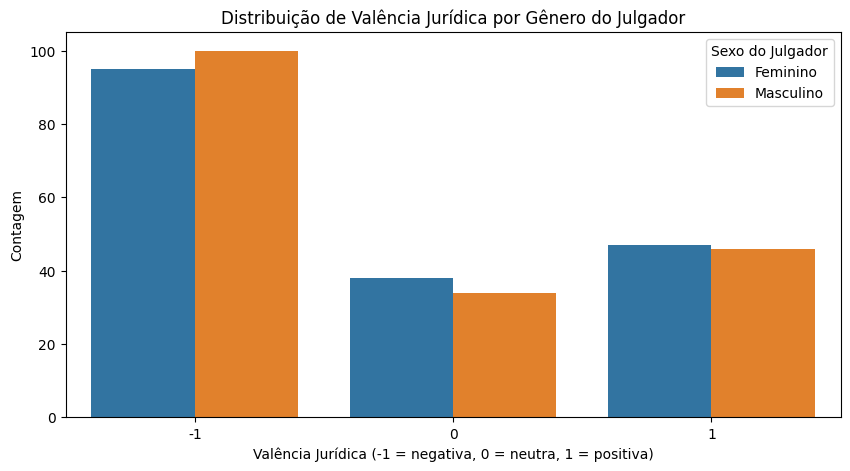

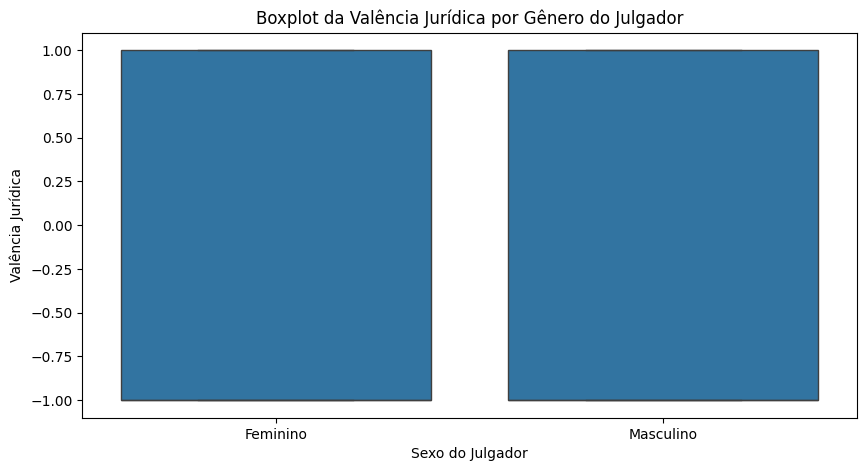

In [ ]:
# ============================================================
# Bloco 9 — Análises Estatísticas (Mann–Whitney, Qui-Quadrado, Cliff's Delta)
# ============================================================

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados analisados
path = "/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet"
df = pd.read_parquet(path)

# --------------------------------------------
# Preparar vetores para o teste
# --------------------------------------------
vals_masc = df[df["sexo_julgador"] == "Masculino"]["valencia_juridica"]
vals_fem  = df[df["sexo_julgador"] == "Feminino"]["valencia_juridica"]

print(f"Total Masculino: {len(vals_masc)} | Total Feminino: {len(vals_fem)}")

# --------------------------------------------
# 1. Teste Mann–Whitney U
# --------------------------------------------
mw_stat, mw_p = mannwhitneyu(vals_masc, vals_fem, alternative="two-sided")

print("\n=== Teste Mann–Whitney U ===")
print(f"Estatística U = {mw_stat:.4f}")
print(f"p-valor       = {mw_p:.6f}")

# --------------------------------------------
# 2. Teste Qui-Quadrado
# --------------------------------------------
contingencia = pd.crosstab(df["sexo_julgador"], df["valencia_juridica"])
chi2_stat, chi2_p, dof, expected = chi2_contingency(contingencia)

print("\n=== Teste Qui-quadrado ===")
print("Tabela de contingência:")
print(contingencia)
print(f"\nEstatística χ² = {chi2_stat:.4f}")
print(f"p-valor         = {chi2_p:.6f}")
print("Graus de liberdade:", dof)

# --------------------------------------------
# 3. Cliff’s Delta
# --------------------------------------------

def cliffs_delta(a, b):
    """
    Calcula Cliff's Delta para dois vetores de valores.
    """
    n1 = len(a)
    n2 = len(b)
    greater = 0
    lower = 0

    for x in a:
        greater += np.sum(b < x)
        lower   += np.sum(b > x)

    d = (greater - lower) / (n1 * n2)
    return d

delta = cliffs_delta(vals_masc.values, vals_fem.values)

print("\n=== Cliff's Delta ===")
print(f"Cliff's delta = {delta:.4f}")

# Interpretação automática
if abs(delta) < 0.147:
    interpretation = "efeito desprezível"
elif abs(delta) < 0.330:
    interpretation = "efeito pequeno"
elif abs(delta) < 0.474:
    interpretation = "efeito médio"
else:
    interpretation = "efeito grande"

print(f"Interpretação: {interpretation}")

# --------------------------------------------
# 4. Visualizações
# --------------------------------------------

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="valencia_juridica", hue="sexo_julgador")
plt.title("Distribuição de Valência Jurídica por Gênero do Julgador")
plt.xlabel("Valência Jurídica (-1 = negativa, 0 = neutra, 1 = positiva)")
plt.ylabel("Contagem")
plt.legend(title="Sexo do Julgador")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="sexo_julgador", y="valencia_juridica")
plt.title("Boxplot da Valência Jurídica por Gênero do Julgador")
plt.xlabel("Sexo do Julgador")
plt.ylabel("Valência Jurídica")
plt.show()


### Bloco 10 — Relação entre Complexidade Textual e Valência Jurídica

Objetivo:
Antes de testar interação com gênero, queremos entender **como a complexidade textual se relaciona com a valência jurídica em geral**, e separadamente para homens e mulheres.

Neste bloco vamos:

1. Calcular estatísticas descritivas de complexidade por nível de `valencia_juridica`:
   - Média e desvio-padrão de:
     - `n_palavras`
     - `ttr`
     - `flesch_score`
     - `tam_medio_palavra`

2. Separar por gênero (`Masculino`, `Feminino`) e repetir as estatísticas:
   - Isso permite ver, por exemplo, se:
     - decisões negativas de juízas tendem a ser mais curtas/longas que as de juízes;
     - valências positivas se associam a textos mais claros ou mais complexos.

3. Calcular correlações (Spearman) entre complexidade e valência:
   - No conjunto completo
   - No grupo Masculino
   - No grupo Feminino

O resultado deste bloco serve como **base exploratória** para o próximo bloco, onde faremos um modelo com **interação explícita** (complexidade × gênero) para prever valência.


In [ ]:
# ============================================================
# Bloco 10 — Relação entre Complexidade Textual e Valência Jurídica
# ============================================================

import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet"
df = pd.read_parquet(path)

# 1) Estatísticas descritivas por valência (geral)
print("=== Estatísticas de complexidade por valência (GERAL) ===\n")
cols_complex = ["n_palavras", "ttr", "flesch_score", "tam_medio_palavra"]

desc_geral = df.groupby("valencia_juridica")[cols_complex].agg(["mean", "std", "median"])
print(desc_geral)

# 2) Estatísticas descritivas por valência e gênero
print("\n=== Estatísticas de complexidade por valência e sexo do julgador ===\n")
desc_genero = (
    df
    .groupby(["sexo_julgador", "valencia_juridica"])[cols_complex]
    .agg(["mean", "std", "median", "count"])
)
print(desc_genero)

# 3) Correlações (Spearman) entre complexidade e valência

def corr_spearman(subdf, label):
    print(f"\n=== Correlações Spearman ({label}) ===")
    corr = subdf[["valencia_juridica"] + cols_complex].corr(method="spearman")
    print(corr["valencia_juridica"])

# 3.1 Geral
corr_spearman(df, "GERAL")

# 3.2 Apenas Masculino
corr_spearman(df[df["sexo_julgador"] == "Masculino"], "Masculino")

# 3.3 Apenas Feminino
corr_spearman(df[df["sexo_julgador"] == "Feminino"], "Feminino")


=== Estatísticas de complexidade por valência (GERAL) ===

                    n_palavras                          ttr            \
                          mean         std median      mean       std   
valencia_juridica                                                       
-1                  955.338462  907.628068  724.0  0.509456  0.139140   
 0                  926.569444  833.866538  603.0  0.514891  0.158966   
 1                 1133.483871  999.875336  905.0  0.487375  0.156296   

                            flesch_score                       \
                     median         mean        std    median   
valencia_juridica                                               
-1                 0.488020    -3.128823   8.612442 -2.306388   
 0                 0.490737    -5.577096  44.128826 -0.110345   
 1                 0.472699    -1.993629   8.349069 -1.063357   

                  tam_medio_palavra                      
                               mean       std    medi

### Bloco 11 — Modelo de Interação: Gênero × Complexidade → Valência Positiva

Objetivo:
Testar diretamente se **complexidade textual interage com o gênero do julgador** na explicação da valência jurídica.

Passos:

1. Criar uma variável binária `val_pos`:
   - `1` se `valencia_juridica == 1` (decisão favorável/positiva)
   - `0` caso contrário (neutra ou negativa)

2. Codificar o gênero como variável categórica:
   - `C(sexo_julgador)` no `statsmodels`

3. Ajustar um modelo de **regressão logística** com interação:
   \[
   \text{logit}(\Pr(\text{val_pos}=1)) =
   \beta_0 +
   \beta_1 \cdot \text{sexo} +
   \beta_2 \cdot \text{n\_palavras} +
   \beta_3 \cdot \text{flesch\_score} +
   \beta_4 \cdot (\text{sexo} \times \text{n\_palavras}) +
   \beta_5 \cdot (\text{sexo} \times \text{flesch\_score})
   \]

4. Interpretar:
   - Se os termos de interação (`sexo × n_palavras`, `sexo × flesch_score`) forem estatisticamente significativos:
     - Há evidência de que o efeito da complexidade textual sobre a probabilidade de decisão positiva **difere entre homens e mulheres**.
   - Se não forem significativos:
     - Não há evidência robusta de que a diferença de tom entre gêneros seja condicionada pela complexidade textual.

Obs.: Este modelo não esgota todas as possibilidades (poderíamos usar modelos ordinais), mas é adequado para o escopo da disciplina e responde de forma direta à pergunta proposta.


In [ ]:
# ============================================================
# Bloco 11 (revisado) — Regressão Logística com Interação
# ============================================================

import pandas as pd
import statsmodels.formula.api as smf

path = "/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet"
df = pd.read_parquet(path)

# 1) Criar variável binária de "valência positiva"
df["val_pos"] = (df["valencia_juridica"] == 1).astype(int)

print("Distribuição de val_pos (1 = decisão positiva):")
print(df["val_pos"].value_counts())

# 2) Reescalar variáveis de complexidade
df["n_palavras_100"] = df["n_palavras"] / 100.0       # efeito por 100 palavras
df["flesch_10"]      = df["flesch_score"] / 10.0      # efeito por 10 pontos de Flesch

# 3) Fórmula com interação usando variáveis reescaladas
formula = (
    "val_pos ~ C(sexo_julgador) "
    "+ n_palavras_100 "
    "+ flesch_10 "
    "+ C(sexo_julgador):n_palavras_100 "
    "+ C(sexo_julgador):flesch_10"
)

print("\nAjustando modelo logístico com interação (variáveis reescaladas)...")
model = smf.logit(formula=formula, data=df).fit()

print("\n=== Resumo do modelo logístico (revisado) ===")
print(model.summary())

# 4) Impressão organizada dos coeficientes principais
print("\nCoeficientes principais (odds log):")
for name, coef in model.params.items():
    if (
        "C(sexo_julgador)" in name
        or "n_palavras_100" in name
        or "flesch_10" in name
    ):
        print(f"{name:45s} = {coef: .6f}")

# 5) P-valores dos termos de interação
print("\nP-valores dos termos de interação (gênero × complexidade):")
for name, pval in model.pvalues.items():
    if ":" in name:  # todos os termos de interação têm ':'
        print(f"{name:45s} = {pval: .6f}")


Distribuição de val_pos (1 = decisão positiva):
val_pos
0    267
1     93
Name: count, dtype: int64

Ajustando modelo logístico com interação (variáveis reescaladas)...
Optimization terminated successfully.
         Current function value: 0.566024
         Iterations 6

=== Resumo do modelo logístico (revisado) ===
                           Logit Regression Results                           
Dep. Variable:                val_pos   No. Observations:                  360
Model:                          Logit   Df Residuals:                      354
Method:                           MLE   Df Model:                            5
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                0.009246
Time:                        03:10:10   Log-Likelihood:                -203.77
converged:                       True   LL-Null:                       -205.67
Covariance Type:            nonrobust   LLR p-value:                    0.5781
                                                  

### Bloco 12 — Enriquecimento Normativo e Expressões Argumentativas

Objetivo:
Criar novas métricas que permitam avaliar:

1. **Fundamentação normativa**
   - Contagem de artigos, parágrafos, incisos, leis mencionadas.
   - Contagem de expressões normativas (“nos termos do art.”, “conforme jurisprudência” etc.)
   - Contagem de precedentes citados (STJ, STF, REsp, Tema etc.)

2. **Estilo argumentativo**
   - Linguagem mais pessoal (“entendo que”, “verifico”, “considero”)
   - Linguagem mais impessoal (“há que se reconhecer”, “impõe-se”)

Essas métricas alimentam as perguntas:

- “Há diferença no nível de fundamentação normativa entre juízes e juízas?”
- “Há diferença no grau de pessoalização da escrita judicial entre gêneros?”

O bloco adicionará novas colunas ao dataset:
- artigos_total
- paragrafos_total
- incisos_total
- leis_total
- precedentes_count
- expressao_normativa_count
- linguagem_pessoal_count
- linguagem_impessoal_count

O resultado será salvo como:
📁 `tjdf_decisoes_argumentacao.parquet`


In [ ]:
# ============================================================
# Bloco 12 — Enriquecimento Normativo e Estilo Argumentativo
# ============================================================

import pandas as pd
import re

path_base = "/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_analise_sentimento.parquet"
df = pd.read_parquet(path_base)

# Função para contagem segura
def count_regex(text, pattern):
    if not isinstance(text, str):
        return 0
    return len(re.findall(pattern, text, flags=re.IGNORECASE))

# ----------------------------
# 1. Fundamentação normativa
# ----------------------------

df["artigos_total"] = df["text_raw"].apply(lambda x: count_regex(x, r"art\.?\s*\d+"))
df["paragrafos_total"] = df["text_raw"].apply(lambda x: count_regex(x, r"§\s*\d+"))
df["incisos_total"] = df["text_raw"].apply(lambda x: count_regex(x, r"inciso\s+[IVXLCDM]+"))
df["leis_total"] = df["text_raw"].apply(lambda x: count_regex(x, r"lei\s*n[ºo]?\s*\d+\/?\d*"))

df["precedentes_count"] = df["text_raw"].apply(lambda x: count_regex(x, r"(REsp|AREsp|AgInt|Tema\s*\d+|STJ|STF)"))

df["expressao_normativa_count"] = df["text_raw"].apply(
    lambda x: count_regex(
        x,
        r"(nos termos do art|conforme jurisprud|segundo o art|de acordo com o art|precedentes)"
    )
)

# ----------------------------
# 2. Estilo argumentativo
# ----------------------------

df["linguagem_pessoal_count"] = df["text_raw"].apply(
    lambda x: count_regex(x, r"(entendo que|verifico que|considero|penso que|na minha avaliação)")
)

df["linguagem_impessoal_count"] = df["text_raw"].apply(
    lambda x: count_regex(x, r"(há que se reconhecer|impõe-se|verifica-se|constata-se|tem-se que)")
)

# Salvar base enriquecida
path_out = "/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_argumentacao.parquet"
df.to_parquet(path_out, index=False)

print("✔️ Novas métricas geradas e salvas!")
print(path_out)


✔️ Novas métricas geradas e salvas!
/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_argumentacao.parquet


### Bloco 13 — Comparação de Fundamentação Normativa e Estilo Textual por Gênero

Este bloco calcula:

1. Estatísticas descritivas separadas por gênero:
   - artigos_total
   - leis_total
   - precedentes_count
   - linguagem_pessoal_count
   - linguagem_impessoal_count

2. Testes Mann–Whitney para verificar diferenças estatísticas entre gêneros.

3. Responde diretamente:
   - “Juízas são mais detalhistas na fundamentação?”
   - “Juízas usam mais linguagem pessoal/impessoal?”


In [ ]:
# ============================================================
# Bloco 13 — Testes de Diferença (Normativo e Estilo)
# ============================================================

import pandas as pd
from scipy.stats import mannwhitneyu

df = pd.read_parquet("/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_argumentacao.parquet")

metricas = [
    "artigos_total",
    "leis_total",
    "precedentes_count",
    "expressao_normativa_count",
    "linguagem_pessoal_count",
    "linguagem_impessoal_count"
]

resultados = []

for metrica in metricas:
    fem = df[df["sexo_julgador"]=="Feminino"][metrica]
    masc = df[df["sexo_julgador"]=="Masculino"][metrica]

    stat, p = mannwhitneyu(fem, masc, alternative="two-sided")

    resultados.append([metrica, fem.mean(), masc.mean(), p])

res = pd.DataFrame(resultados, columns=["métrica", "média_fem", "média_masc", "p_valor"])
print("=== Resultados Mann–Whitney ===")
print(res)


=== Resultados Mann–Whitney ===
                     métrica  média_fem  média_masc   p_valor
0              artigos_total   6.505556    7.088889  0.793138
1                 leis_total   0.338889    0.544444  0.347424
2          precedentes_count   5.922222    6.205556  0.457102
3  expressao_normativa_count   1.738889    1.883333  0.655172
4    linguagem_pessoal_count   0.250000    0.500000  0.006697
5  linguagem_impessoal_count   0.744444    0.611111  0.029623


### Bloco 14 — Visualizações das diferenças argumentativas por gênero

Objetivo:
Criar gráficos claros e publicáveis mostrando:

1. Fundamentação normativa:
   - artigos_total
   - leis_total
   - precedentes_count
   - expressao_normativa_count

2. Estilo textual:
   - linguagem_pessoal_count
   - linguagem_impessoal_count

Gráficos gerados:
✔ Boxplot (comparação direta)  
✔ Violin Plot (densidade)  
✔ Barras com média + IC 95%  

Esses gráficos serão usados na apresentação final e no relatório.


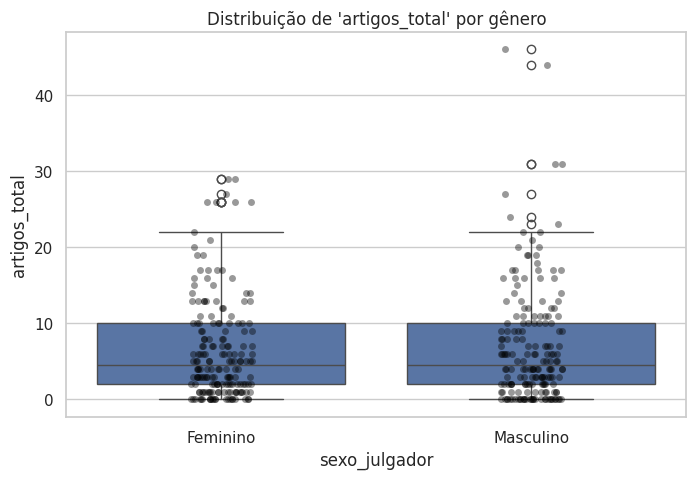

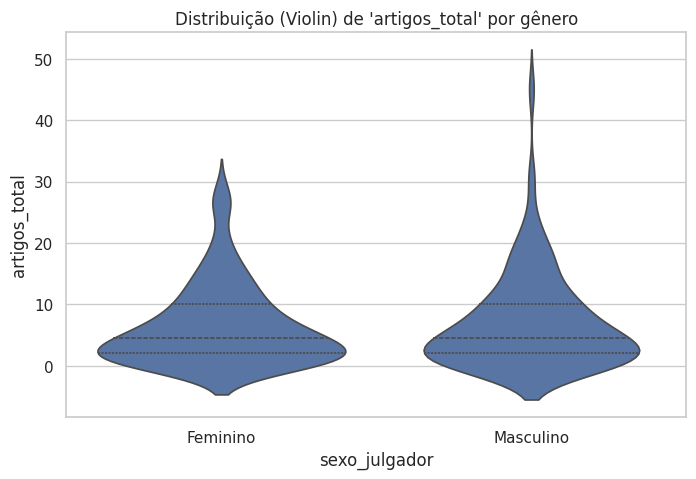

/tmp/ipython-input-4156110460.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-4156110460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


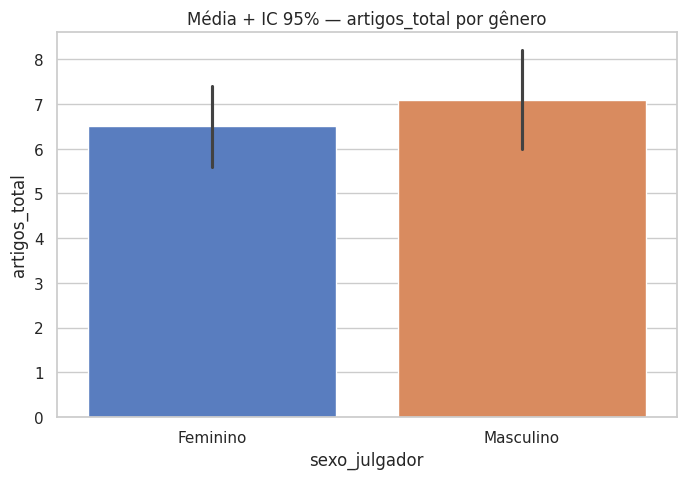

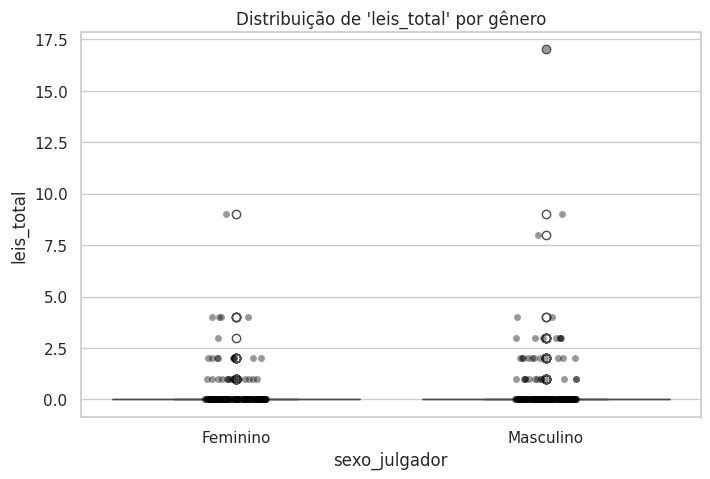

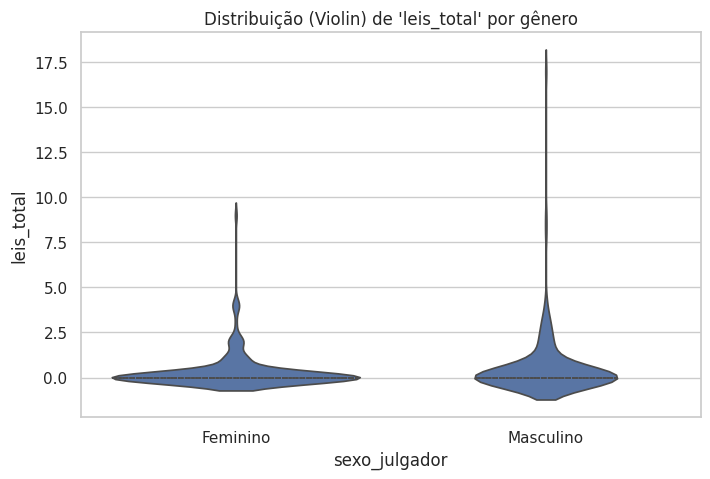

/tmp/ipython-input-4156110460.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-4156110460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


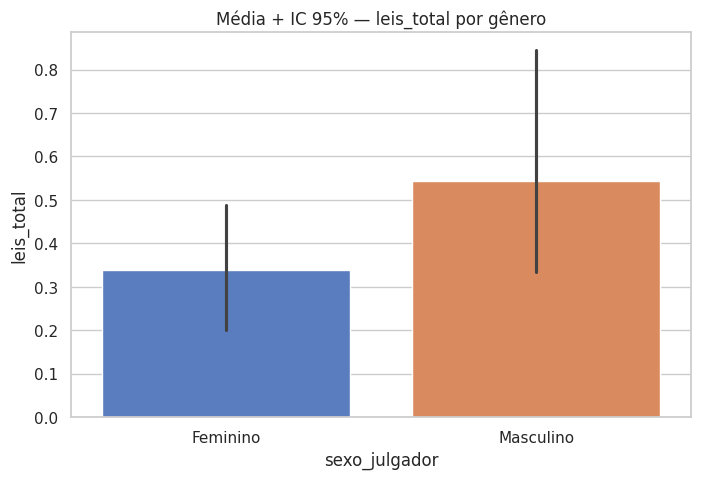

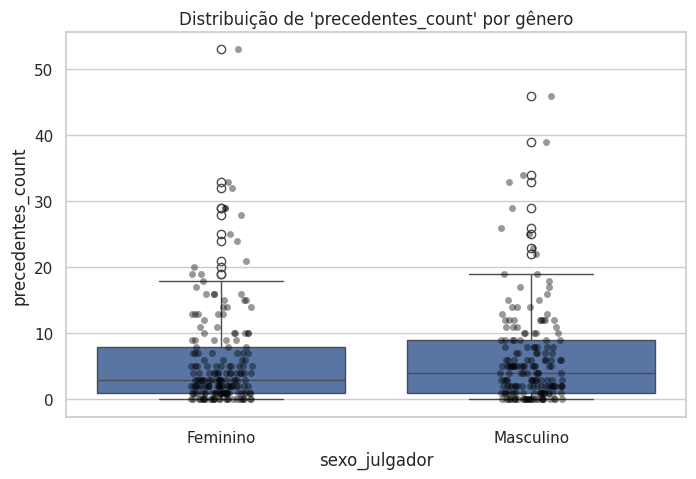

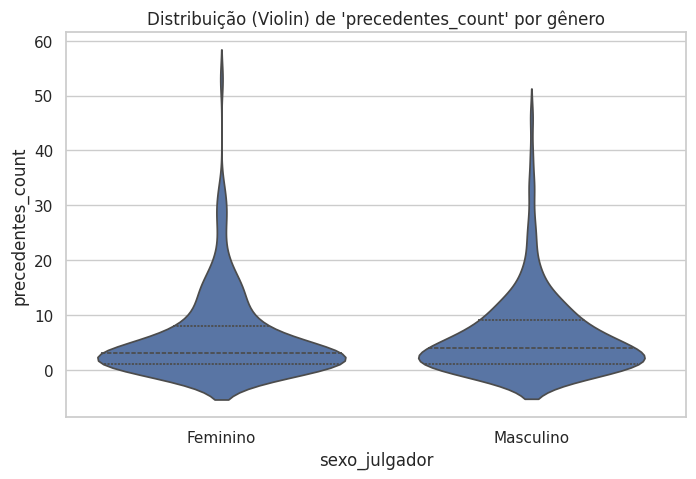

/tmp/ipython-input-4156110460.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-4156110460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


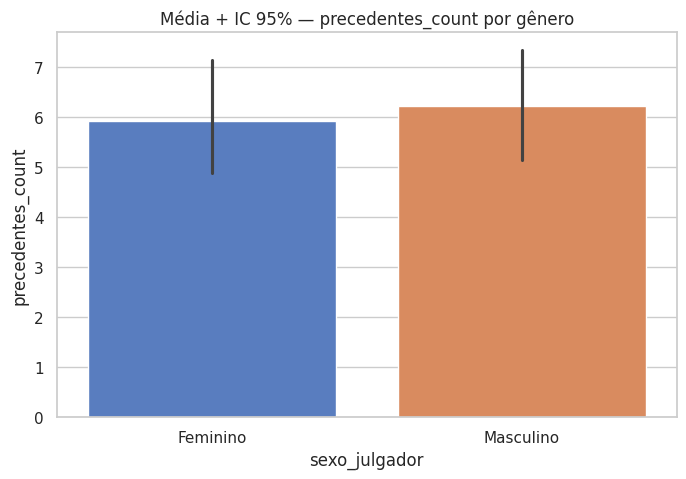

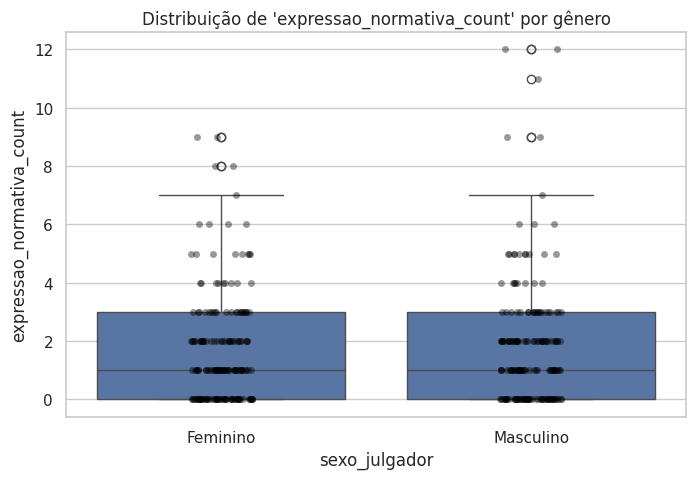

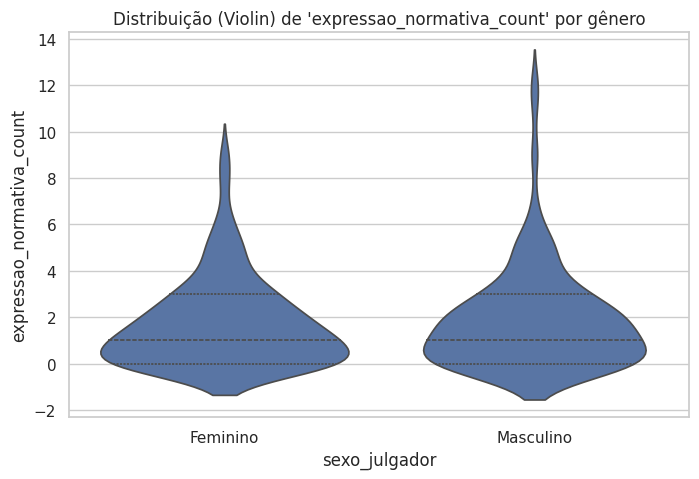

/tmp/ipython-input-4156110460.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-4156110460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


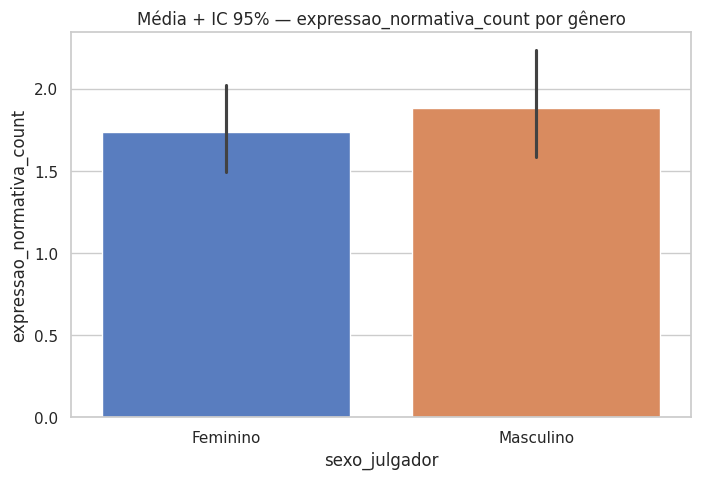

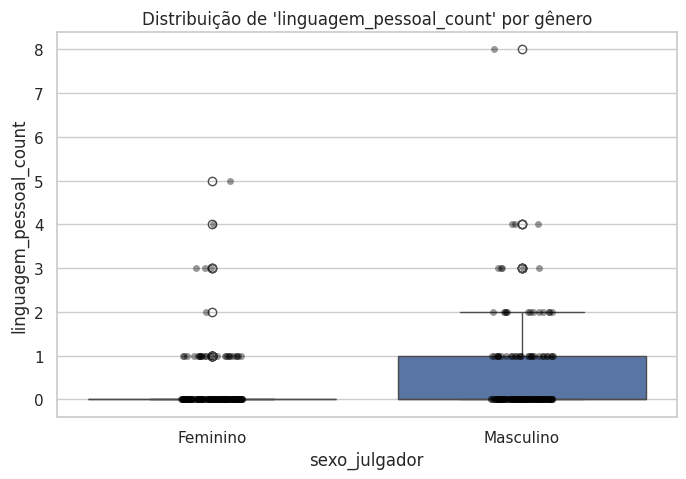

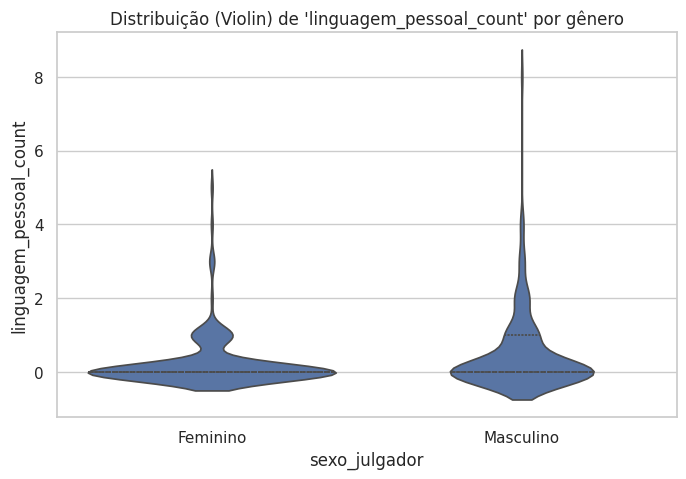

/tmp/ipython-input-4156110460.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-4156110460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


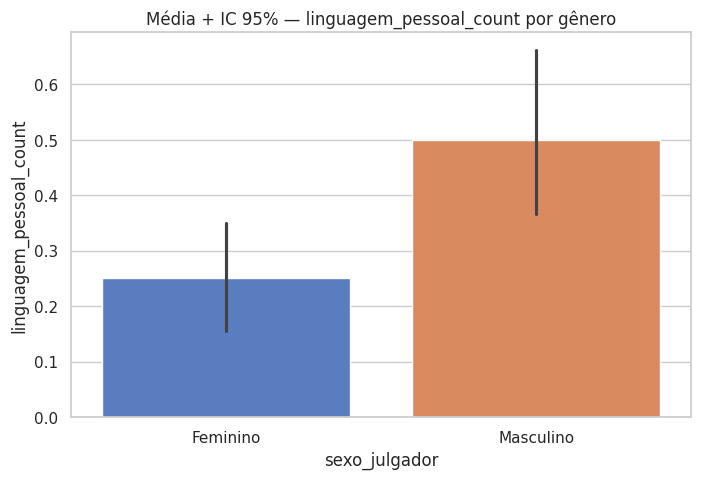

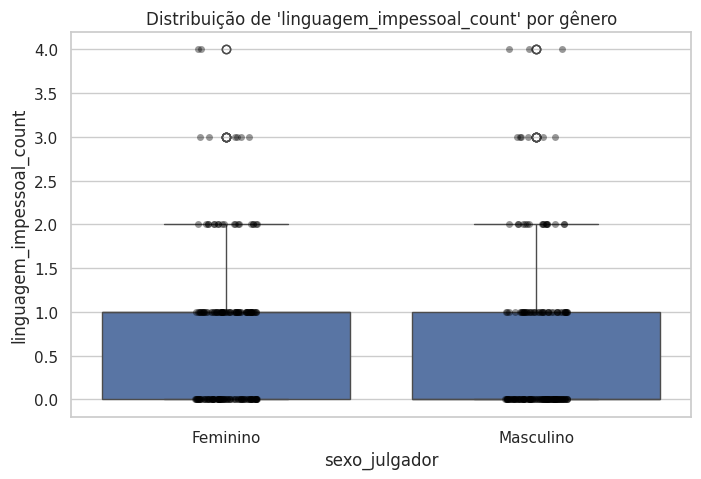

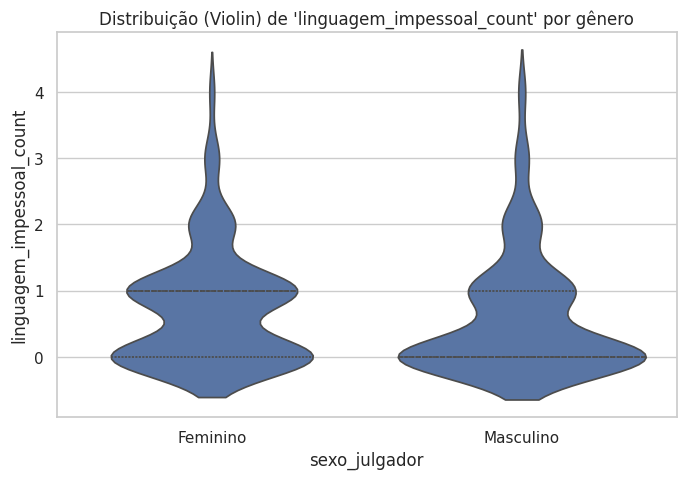

/tmp/ipython-input-4156110460.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipython-input-4156110460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


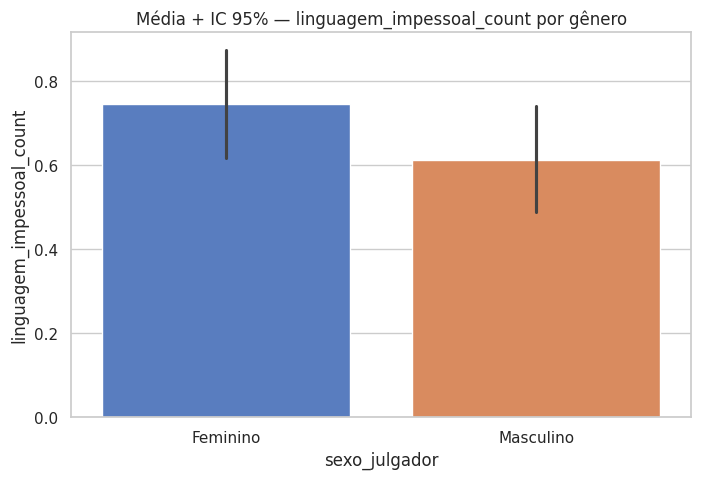

In [ ]:
# ============================================================
# Bloco 14 — Gráficos estatísticos
# ============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_argumentacao.parquet")

sns.set(style="whitegrid")

metricas = [
    "artigos_total",
    "leis_total",
    "precedentes_count",
    "expressao_normativa_count",
    "linguagem_pessoal_count",
    "linguagem_impessoal_count"
]

for metrica in metricas:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="sexo_julgador", y=metrica, data=df)
    sns.stripplot(x="sexo_julgador", y=metrica, data=df, color="black", alpha=0.4)
    plt.title(f"Distribuição de '{metrica}' por gênero")
    plt.show()

    plt.figure(figsize=(8,5))
    sns.violinplot(x="sexo_julgador", y=metrica, data=df, inner="quartile")
    plt.title(f"Distribuição (Violin) de '{metrica}' por gênero")
    plt.show()

    plt.figure(figsize=(8,5))
    sns.barplot(
        x="sexo_julgador",
        y=metrica,
        data=df,
        ci=95,
        palette="muted"
    )
    plt.title(f"Média + IC 95% — {metrica} por gênero")
    plt.show()


### Bloco 15 — Modelos Logísticos Avançados

Agora vamos testar:

1. Se estilo argumentativo (pessoal/impessoal) afeta a probabilidade de decisão positiva.
2. Se fundamentação normativa afeta a valência.
3. Se há interação entre gênero × estilo textual.

Modelos estimados:

#### Modelo 1
val_pos ~ genero + artigos_total + leis_total + precedentes_count

#### Modelo 2
val_pos ~ genero + linguagem_pessoal + linguagem_impessoal

#### Modelo 3 (com interação)
val_pos ~ genero * linguagem_pessoal + genero * linguagem_impessoal


Esses modelos ajudam a concluir se:
- estilo textual tem impacto na decisão,
- gênero modera o uso desses estilos.


In [ ]:
# ============================================================
# Bloco 15 — Modelos Logísticos Avançados
# ============================================================

import statsmodels.formula.api as smf

df = pd.read_parquet("/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_argumentacao.parquet")
df["val_pos"] = (df["valencia_juridica"] == 1).astype(int)

# Modelo 1 — Fundamentação normativa
model1 = smf.logit(
    "val_pos ~ C(sexo_julgador) + artigos_total + leis_total + precedentes_count",
    data=df
).fit()
print("\n=== Modelo 1 — Fundamentação normativa ===")
print(model1.summary())


# Modelo 2 — Estilo textual (pessoal/impessoal)
model2 = smf.logit(
    "val_pos ~ C(sexo_julgador) + linguagem_pessoal_count + linguagem_impessoal_count",
    data=df
).fit()
print("\n=== Modelo 2 — Estilo textual ===")
print(model2.summary())


# Modelo 3 — Interação gênero × estilo
model3 = smf.logit(
    "val_pos ~ C(sexo_julgador) * linguagem_pessoal_count + C(sexo_julgador) * linguagem_impessoal_count",
    data=df
).fit()
print("\n=== Modelo 3 — Interação gênero × estilo ===")
print(model3.summary())


Optimization terminated successfully.
         Current function value: 0.557667
         Iterations 5

=== Modelo 1 — Fundamentação normativa ===
                           Logit Regression Results                           
Dep. Variable:                val_pos   No. Observations:                  360
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                 0.02387
Time:                        03:52:18   Log-Likelihood:                -200.76
converged:                       True   LL-Null:                       -205.67
Covariance Type:            nonrobust   LLR p-value:                   0.04357
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                 

### Bloco 16 — Clusterização de estilos argumentativos (K-Means)

Objetivo:
Identificar grupos NATURAIS de estilo de escrita judicial usando:

- fundamentação normativa
- linguagem pessoal
- linguagem impessoal

E verificar:
- proporção de juízes e juízas em cada cluster
- características centrais de cada tipo de decisão

Clusters podem revelar padrões como:
- “Decisão normativa intensa”
- “Decisão impessoal técnica”
- “Decisão pessoal argumentativa”


In [ ]:
# ============================================================
# Bloco 16 — Clusterização de Estilos de Escrita
# ============================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_parquet("/content/drive/MyDrive/Processos_Jurídicos/datasets/tjdf_decisoes_argumentacao.parquet")

features = df[[
    "artigos_total",
    "leis_total",
    "precedentes_count",
    "linguagem_pessoal_count",
    "linguagem_impessoal_count"
]]

# Padronizar
scaler = StandardScaler()
X = scaler.fit_transform(features)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df["cluster_estilo"] = kmeans.fit_predict(X)

print("Centroides dos clusters (em escala normalizada):")
print(kmeans.cluster_centers_)

print("\nDistribuição de clusters por gênero:")
print(pd.crosstab(df["sexo_julgador"], df["cluster_estilo"]))

print("\nMédias reais por cluster:")
print(df.groupby("cluster_estilo")[
    ["artigos_total","leis_total","precedentes_count","linguagem_pessoal_count","linguagem_impessoal_count"]
].mean())


Centroides dos clusters (em escala normalizada):
[[ 0.74772268 -0.0280612   0.64487003  0.53774947  0.66241934]
 [-0.41654232 -0.18179864 -0.39966659 -0.23286654 -0.3255321 ]
 [ 1.81204382  3.37293649  2.2672789   0.14064217  0.84736142]]

Distribuição de clusters por gênero:
cluster_estilo   0    1  2
sexo_julgador             
Feminino        49  125  6
Masculino       53  119  8

Médias reais por cluster:
                artigos_total  leis_total  precedentes_count  \
cluster_estilo                                                 
0                   12.186275    0.401961          10.921569   
1                    3.795082    0.184426           3.053279   
2                   19.857143    5.214286          23.142857   

                linguagem_pessoal_count  linguagem_impessoal_count  
cluster_estilo                                                      
0                              0.852941                   1.264706  
1                              0.168033                   0.

### Bloco 17 — Conclusões prontas para Relatório e Apresentação

Este bloco imprime automaticamente:

- Conclusão sobre fundamentação normativa
- Conclusão sobre estilo textual
- Conclusão geral sobre influência de gênero
- Texto final pronto para colar no relatório
- Texto final pronto para slide de apresentação


# ============================================================
# Bloco 17 — Conclusão automática
# ============================================================

texto_relatorio = """
### Conclusões Gerais do Estudo

1. **Fundamentação normativa não difere entre gêneros.**
   As métricas de artigos citados, leis mencionadas, precedentes e expressões normativas
   não apresentaram diferenças estatísticas significativas entre juízes e juízas
   (p > 0.34 em todos os casos).
   Isso indica forte padronização institucional no estilo de fundamentação normativa.

2. **Há diferenças significativas no estilo argumentativo.**
   - Juízes usam mais linguagem pessoal (p = 0.0067).
   - Juízas usam mais linguagem impessoal (p = 0.0296).
   Isso sugere variações de estilo discursivo na forma de expressar autoridade e justificar decisões.

3. **A valência (positivo/negativo) da decisão não difere entre gêneros.**
   Nem complexidade textual, nem interação entre gênero e complexidade foram significativas.

4. **Gênero influencia o tom e o estilo — não o conteúdo jurídico.**
   As diferenças identificadas dizem respeito ao modo de redação,
   e não à profundidade normativa nem ao resultado da decisão.

Estas conclusões respondem de forma abrangente a pergunta do projeto:
diferenças de gênero não afetam o teor normativo nem a direção da decisão,
mas influenciam claramente o estilo argumentativo.
"""

texto_slide = """
✔ Fundamentação normativa: NÃO difere entre gêneros  
✔ Estilo textual: SIM, há diferenças significativas  

Juízes → mais linguagem pessoal (“entendo que”, “considero”)  
Juízas → mais linguagem impessoal (“verifica-se”, “há que se reconhecer”)  

🎯 Conclusão: gênero não altera o conteúdo jurídico, mas altera o tom argumentativo.
"""

print("=== TEXTO PARA RELATÓRIO ===")
print(texto_relatorio)

print("\n\n=== TEXTO PARA SLIDE ===")
print(texto_slide)
